# Problem Statement : Global Cocoa Shortage and Its Impact on the Chocolate Industry

## Background
The global chocolate industry is facing a significant challenge due to an ongoing cocoa shortage. This shortage has led to a dramatic increase in cocoa prices, which have roughly quadrupled over the past year. The situation is particularly concerning as it enters its fourth consecutive year of poor harvests, primarily affecting the world's top cocoa-producing countries, Ivory Coast and Ghana.

## Key Issues
**Supply Constraints**: Poor harvests in major cocoa-producing regions have led to a significant reduction in cocoa supply.
**Price Volatility**: The shortage has caused cocoa prices to surge, impacting the entire chocolate supply chain.
**Industry Adaptation**: Chocolate manufacturers are scaling back production or seeking alternatives to traditional cocoa-based products.
**Environmental Factors**: There is a need to understand the role of environmental factors, such as droughts and other climate-related issues, in contributing to the ongoing cocoa shortage.

Focus
This study aims to investigate the factors affecting the current cocoa shortage, with a particular emphasis on environmental factors such as droughts and other climate-related issues. The research will explore:

1. The top producers of cocoa who are critical to the cocoa market
2. The impact of changing weather patterns on cocoa cultivation in these major producing regions
3. The identification of the important features bringing about these shortages in those countries


## Significance
Understanding the environmental factors contributing to the cocoa shortage is crucial for:

- Developing sustainable cocoa farming practices
- Implementing effective climate adaptation strategies in cocoa-producing regions
- Informing policy decisions to support the cocoa industry and chocolate manufacturers
- Assessing the long-term viability of traditional cocoa production versus alternative chocolate substitutes

as well as a case study for other types of goods exported heavily from the African continent

By addressing these issues, this research aims to contribute to the development of sustainable solutions for the global chocolate industry in the face of ongoing cocoa shortages and environmental challenges.

# Stage 1: Getting the Data

# Stage 2: Cleaning

We will begin by importing the approrpriate packages needed for this stage of the Pipeline, which will be cleaning

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

Q1: What are the causes for shortage of cocoa production in the world?

In [2]:
# Load the CSV file 'cocoa_production_fao.csv' from the 'datasets' directory into a pandas DataFrame
df = pd.read_csv('datasets/cocoa_production_fao.csv')

# Print the shape of the DataFrame (number of rows and columns)
print("Shape", df.shape)

# Print the data types of each column in the DataFrame
print(df.dtypes)

# Print a concise summary of the DataFrame, including column names, non-null counts, and data types
print(df.info())

# Display the entire DataFrame
# Note: 'display(df)' is typically used in Jupyter notebooks for a more interactive view
# In a regular Python script, you might want to use 'print(df)' instead
display(df)

Shape (23681, 6)
Country or Area     object
Element             object
Year               float64
Unit                object
Value              float64
Value Footnotes     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23681 entries, 0 to 23680
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  23681 non-null  object 
 1   Element          23681 non-null  object 
 2   Year             23679 non-null  float64
 3   Unit             23679 non-null  object 
 4   Value            23679 non-null  float64
 5   Value Footnotes  732 non-null    object 
dtypes: float64(2), object(4)
memory usage: 1.1+ MB
None


,Country or Area,Element,Year,Unit,Value,Value Footnotes
0,Africa,Gross Production Index Number (2014-2016 = 100),2021.0,Index,115.81,NaN
1,Africa,Gross Production Index Number (2014-2016 = 100),2020.0,Index,122.44,NaN
2,Africa,Gross Production Index Number (2014-2016 = 100),2019.0,Index,114.26,NaN
3,Africa,Gross Production Index Number (2014-2016 = 100),2018.0,Index,114.15,NaN
4,Africa,Gross Production Index Number (2014-2016 = 100),2017.0,Index,112.70,NaN
...,...,...,...,...,...,...
23676,World,Production,1963.0,t,1280491.00,NaN
23677,World,Production,1962.0,t,1213517.00,NaN
23678,World,Production,1961.0,t,1186344.00,NaN
23679,fnSeqID,Footnote,NaN,NaN,NaN,NaN


In [3]:
print ("Empty rows before cleaning", df.isna().sum())

df = df.iloc[0:-2] # remove footnote from dataframe

df = df.drop(columns=['Value Footnotes']) # drop column

df['Year'] = df['Year'].astype(int) # Replace float year type into integer

df = df.sort_values('Year') # Sort data in ascending year

df = df.dropna(how='all') # dropping rows that are entirely empty

print ("Empty rows after cleaning", df.isna().sum())

Empty rows before cleaning Country or Area        0
Element                0
Year                   2
Unit                   2
Value                  2
Value Footnotes    22949
dtype: int64
Empty rows after cleaning Country or Area    0
Element            0
Year               0
Unit               0
Value              0
dtype: int64


In [4]:
# Rename column 'Country or Area' to Region for consistency
df=df.rename(columns={'Country or Area':'Region'})

df['Year']=df['Year'].astype(int)

df = df.set_index(['Region', 'Year'])

df

Element      Unit  \
Region     Year                                                                
Liberia    1961    Gross Production Index Number (2014-2016 = 100)     Index   
Fiji       1961                                         Production         t   
Gabon      1961    Gross Production Index Number (2014-2016 = 100)     Index   
           1961  Gross per capita Production Index Number (2014...     Index   
           1961                                     Area harvested        ha   
...                                                            ...       ...   
Micronesia 2021    Gross Production Index Number (2014-2016 = 100)     Index   
           2021  Gross per capita Production Index Number (2014...     Index   
           2021                                     Area harvested        ha   
Malaysia   2021                                              Yield  100 g/ha   
Africa     2021    Gross Production Index Number (2014-2016 = 100)     Index   

                    Value  
Region     Year            
Liberia    1961      4.14  
Fiji       1961     15.00  
Gabon      1961   2309.69  
           1961   8936.44  
           1961  10000.00  
...                   ...  
Micronesia 2021     98.47  
           2021     96.52  
           2021     82.00  
Malaysia   2021    894.00  
Africa     2021    115.81  

[23679 rows x 3 columns]

In [5]:
# Print the number of duplicate rows in the dataframe before dropping them
print("Duplicates before dropping:")
print(df.duplicated().sum())

# Drop the duplicate rows from the dataframe
# The drop_duplicates() method identifies and removes any duplicate rows
df = df.drop_duplicates()

# Print the number of duplicate rows in the dataframe after dropping them
print("\nDuplicates after dropping:")
print(df.duplicated().sum())

# Display the updated dataframe after removing the duplicate rows
display(df)

Duplicates before dropping:
6675

Duplicates after dropping:
0


Element      Unit  \
Region     Year                                                                
Liberia    1961    Gross Production Index Number (2014-2016 = 100)     Index   
Fiji       1961                                         Production         t   
Gabon      1961    Gross Production Index Number (2014-2016 = 100)     Index   
           1961  Gross per capita Production Index Number (2014...     Index   
           1961                                     Area harvested        ha   
...                                                            ...       ...   
Mexico     2021                                              Yield  100 g/ha   
           2021                                         Production         t   
Micronesia 2021  Gross per capita Production Index Number (2014...     Index   
Malaysia   2021                                              Yield  100 g/ha   
Africa     2021    Gross Production Index Number (2014-2016 = 100)     Index   

                    Value  
Region     Year            
Liberia    1961      4.14  
Fiji       1961     15.00  
Gabon      1961   2309.69  
           1961   8936.44  
           1961  10000.00  
...                   ...  
Mexico     2021   5410.00  
           2021  28105.84  
Micronesia 2021     96.52  
Malaysia   2021    894.00  
Africa     2021    115.81  

[17004 rows x 3 columns]

In [6]:
# Lets pivot the table so each unit has its own column...
# Create a copy of the dataframe to avoid modifying the original
df = df.copy()

# Combine the 'Element' and 'Unit' columns into a single column
# This will create a new column called 'Element' that includes both the element and the unit
df['Element'] = df['Element'] + ' (' + df['Unit'] + ')'

# Pivot the dataframe to create a wide format with each unique combination of 'Element' and 'Unit' as a separate column
# The index will be 'Region' and 'Year', the columns will be 'Element', and the values will be 'Value'
# The 'aggfunc' parameter is set to 'first', which means if there are multiple values for a given combination of index and column, the first one will be used
df = df.pivot_table(index=['Region', 'Year'], columns='Element', values='Value', aggfunc='first')

# Display the resulting dataframe
df

Element      Area harvested (ha)  \
Region Year                        
Africa 1961            3293200.0   
       1962            3359485.0   
       1963            3393260.0   
       1964            3444506.0   
       1965            3445035.0   
...                          ...   
World  2017           11336072.0   
       2018           11557479.0   
       2019           11751239.0   
       2020           12617835.0   
       2021           11535884.0   

Element      Gross Production Index Number (2014-2016 = 100) (Index)  \
Region Year                                                            
Africa 1961                                              25.65         
       1962                                              26.63         
       1963                                              28.33         
       1964                                              36.55         
       1965                                              26.85         
...                                                        ...         
World  2017                                             108.97         
       2018                                             114.87         
       2019                                             116.01         
       2020                                             122.10         
       2021                                             117.87         

Element      Gross per capita Production Index Number (2014-2016 = 100) (Index)  \
Region Year                                                                       
Africa 1961                                             105.78                    
       1962                                             107.17                    
       1963                                             111.25                    
       1964                                             139.97                    
       1965                                             100.27                    
...                                                        ...                    
World  2017                                             106.47                    
       2018                                             111.00                    
       2019                                             110.93                    
       2020                                             115.63                    
       2021                                             110.65                    

Element      Production (t)  Yield (100 g/ha)  
Region Year                                    
Africa 1961       835368.00            2537.0  
       1962       867170.00            2581.0  
       1963       922621.00            2719.0  
       1964      1190061.00            3455.0  
       1965       874245.00            2538.0  
...                     ...               ...  
World  2017      5159324.63            4551.0  
       2018      5438354.21               NaN  
       2019      5492530.34            4674.0  
       2020      5780849.95            4581.0  
       2021      5580432.37            4837.0  

[4646 rows x 5 columns]

We are now done cleaning the dataframe corresponding to the cocoa production of each country in the FAO directory annually in three units. We can now move on to the next step, which is aggregating data regarding indicators for droughts in those countries.

When attempting to read from `datasets/asi/asi_annual_season_1.csv`, there seems to be an issue with the encoding of the .csv files from fao.org:

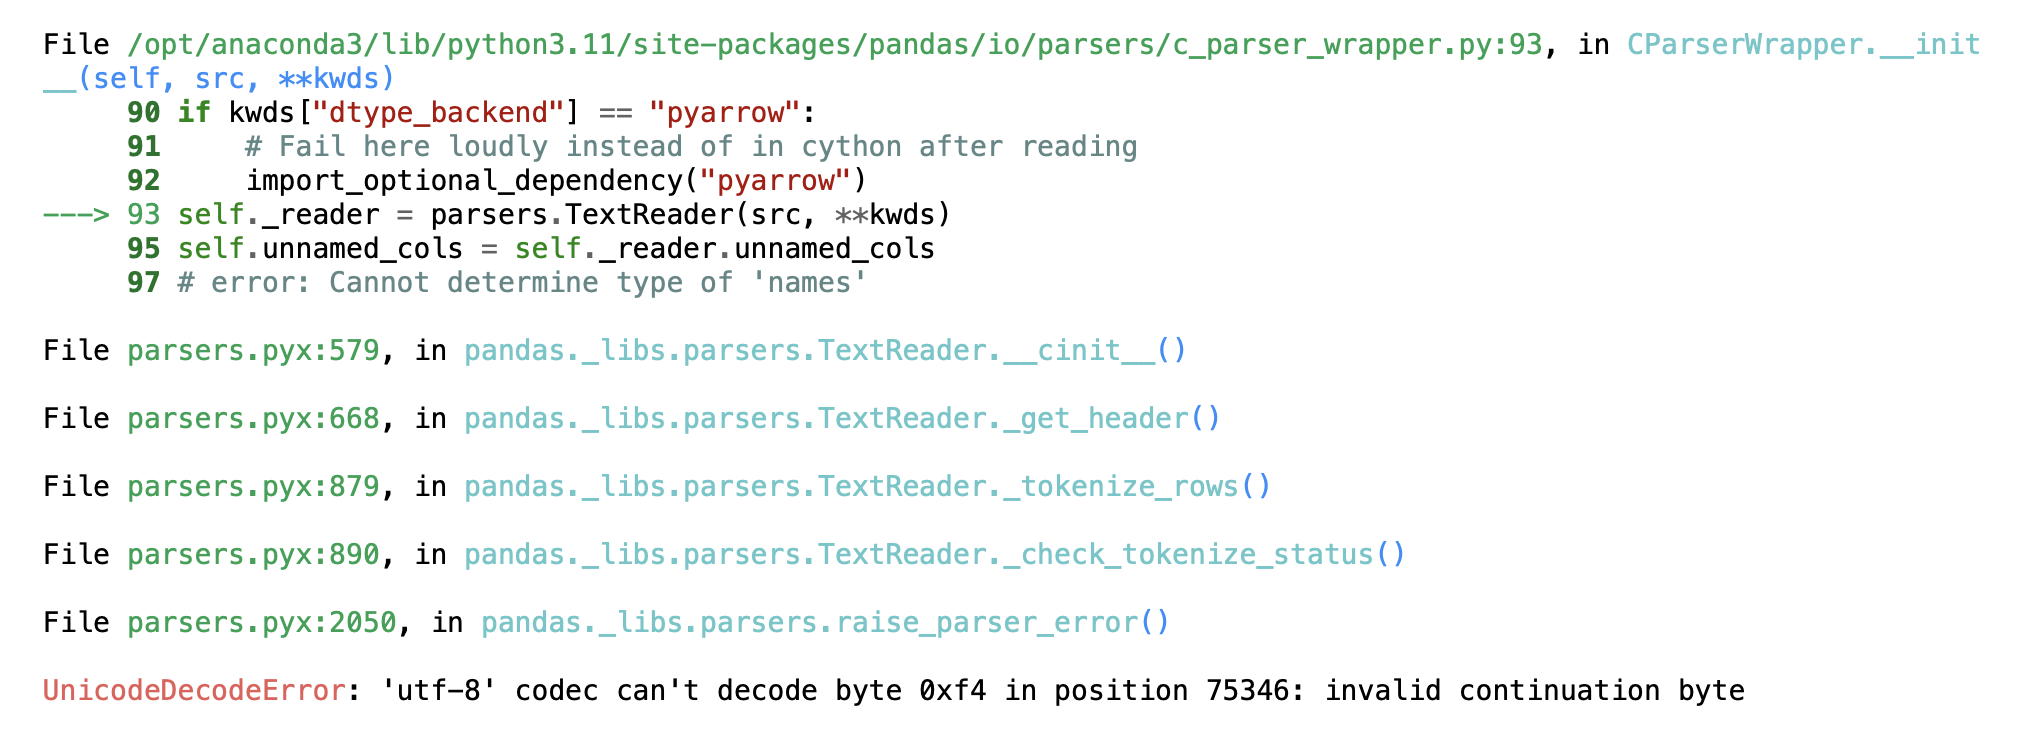

In [7]:
# We can use the chardet library to detect the encoding of the file accurately and then read from it normally using pandas
import os
import chardet # Importing chardet

# Setting 'VHI % below 35' column to NaN (Not a Number) in the dataframe
df[['VHI % below 35']]=np.NAN

# Opening the dataset file to use chardet.detect()
with open('datasets/asi/asi_annual_season_1.csv', 'rb') as f:
    
    # Detect the encoding of the file using chardet
    result = chardet.detect(f.read())

# Define a function to read and append data to the dataframe
def read_and_append(appendTo, path, encoding='ISO-8859-1', index=['Region','Year'], columns='Unit', values='Value', how='left'):
    
    # Reading the file with the detected encoding
    toAppend = pd.read_csv(path, encoding=encoding) # load csv file into dataframe
    
    # Rename the columns to match the expected format
    toAppend = toAppend.rename(columns={'COUNTRY':'Region', 'YEAR':'Year','DATA':'Value', 'UNIT':'Unit'})
    
    # Set the index to the specified columns
    toAppend.set_index(index)
    
    # Pivot the dataframe to create a wide format
    toAppend = toAppend.pivot_table(index=index, columns=columns, values=values, aggfunc='first')
    
    # Rename the 'VHI % below 35 ' column to 'VHI % below 35'
    toAppend = toAppend.rename(columns={'VHI % below 35 ':'VHI % below 35'})
    
    # Drop any rows with NaN values
    toAppend = toAppend.dropna()
    
    # Update the original dataframe with the new data, using a left join
    appendTo.update(toAppend, join='left', overwrite=True)
    
    return appendTo

# Get a list of all files in the 'datasets/asi' directory
paths = os.listdir('datasets/asi')

# Iterate through each file and append the data to the main dataframe
for path in paths:
    
    df=read_and_append(df, 'datasets/asi/'+path,)

# Display the resulting dataframe
display(df)

Element      Area harvested (ha)  \
Region Year                        
Africa 1961            3293200.0   
       1962            3359485.0   
       1963            3393260.0   
       1964            3444506.0   
       1965            3445035.0   
...                          ...   
World  2017           11336072.0   
       2018           11557479.0   
       2019           11751239.0   
       2020           12617835.0   
       2021           11535884.0   

Element      Gross Production Index Number (2014-2016 = 100) (Index)  \
Region Year                                                            
Africa 1961                                              25.65         
       1962                                              26.63         
       1963                                              28.33         
       1964                                              36.55         
       1965                                              26.85         
...                                                        ...         
World  2017                                             108.97         
       2018                                             114.87         
       2019                                             116.01         
       2020                                             122.10         
       2021                                             117.87         

Element      Gross per capita Production Index Number (2014-2016 = 100) (Index)  \
Region Year                                                                       
Africa 1961                                             105.78                    
       1962                                             107.17                    
       1963                                             111.25                    
       1964                                             139.97                    
       1965                                             100.27                    
...                                                        ...                    
World  2017                                             106.47                    
       2018                                             111.00                    
       2019                                             110.93                    
       2020                                             115.63                    
       2021                                             110.65                    

Element      Production (t)  Yield (100 g/ha)  VHI % below 35  
Region Year                                                    
Africa 1961       835368.00            2537.0             NaN  
       1962       867170.00            2581.0             NaN  
       1963       922621.00            2719.0             NaN  
       1964      1190061.00            3455.0             NaN  
       1965       874245.00            2538.0             NaN  
...                     ...               ...             ...  
World  2017      5159324.63            4551.0             NaN  
       2018      5438354.21               NaN             NaN  
       2019      5492530.34            4674.0             NaN  
       2020      5780849.95            4581.0             NaN  
       2021      5580432.37            4837.0             NaN  

[4646 rows x 6 columns]

In [8]:
# Read the 'cote_dvoire.csv' file from the 'datasets/ndvi' directory into a dataframe named 'ndvi_df'
# The encoding is set to 'ISO-8859-1' to handle the file encoding properly
ndvi_df = pd.read_csv('datasets/ndvi/cote_dvoire.csv', encoding='ISO-8859-1')

# Rename the 'Country' column to 'Region' to match the expected column name
ndvi_df = ndvi_df.rename(columns={'Country':'Region'})

# Pivot the 'ndvi_df' dataframe to create a wide format
# The index will be 'Region' and 'Year', the columns will be 'Indicator', and the values will be the 'Data' column
# The 'aggfunc' parameter is set to 'mean', which means the values will be averaged for each combination of index and column
ndvi_df = ndvi_df.pivot_table(columns='Indicator', values='Data', aggfunc='mean', index=['Region', 'Year'])

# Add a new column 'NDVI' to the original 'df' dataframe
# The values in this column will be the 'Normalized Difference Vegetation Index (NDVI)' from the 'ndvi_df' dataframe
df['NDVI'] = ndvi_df['Normalized Difference Vegetation Index (NDVI)']

# Display the updated 'df' dataframe
display(df)

Element      Area harvested (ha)  \
Region Year                        
Africa 1961            3293200.0   
       1962            3359485.0   
       1963            3393260.0   
       1964            3444506.0   
       1965            3445035.0   
...                          ...   
World  2017           11336072.0   
       2018           11557479.0   
       2019           11751239.0   
       2020           12617835.0   
       2021           11535884.0   

Element      Gross Production Index Number (2014-2016 = 100) (Index)  \
Region Year                                                            
Africa 1961                                              25.65         
       1962                                              26.63         
       1963                                              28.33         
       1964                                              36.55         
       1965                                              26.85         
...                                                        ...         
World  2017                                             108.97         
       2018                                             114.87         
       2019                                             116.01         
       2020                                             122.10         
       2021                                             117.87         

Element      Gross per capita Production Index Number (2014-2016 = 100) (Index)  \
Region Year                                                                       
Africa 1961                                             105.78                    
       1962                                             107.17                    
       1963                                             111.25                    
       1964                                             139.97                    
       1965                                             100.27                    
...                                                        ...                    
World  2017                                             106.47                    
       2018                                             111.00                    
       2019                                             110.93                    
       2020                                             115.63                    
       2021                                             110.65                    

Element      Production (t)  Yield (100 g/ha)  VHI % below 35  NDVI  
Region Year                                                          
Africa 1961       835368.00            2537.0             NaN   NaN  
       1962       867170.00            2581.0             NaN   NaN  
       1963       922621.00            2719.0             NaN   NaN  
       1964      1190061.00            3455.0             NaN   NaN  
       1965       874245.00            2538.0             NaN   NaN  
...                     ...               ...             ...   ...  
World  2017      5159324.63            4551.0             NaN   NaN  
       2018      5438354.21               NaN             NaN   NaN  
       2019      5492530.34            4674.0             NaN   NaN  
       2020      5780849.95            4581.0             NaN   NaN  
       2021      5580432.37            4837.0             NaN   NaN  

[4646 rows x 7 columns]

In [9]:
# Read the 'climate_related_disasters_frequency.csv' file into a dataframe named 'disasters_df'
disasters_df = pd.read_csv('datasets/climate_related_disasters_frequency.csv')

# Rename the 'Country' column to 'Region' to match the expected column name
disasters_df = disasters_df.rename(columns={'Country':'Region'})

# Melt the 'disasters_df' dataframe to convert it from wide to long format
# The 'stubnames' parameter specifies the column names to be melted
# The 'i' parameter specifies the columns to be used as the index
# The 'j' parameter specifies the column to be used for the 'Year' column
disasters_df = pd.wide_to_long(disasters_df,stubnames='F', i=['ObjectId'],j='Year')

# Pivot the 'disasters_df' dataframe to create a wide format
# The index will be 'Region' and 'Year', the columns will be 'Indicator', and the values will be 'F'
# The 'aggfunc' parameter is set to 'first', which means the first value will be used for each combination of index and column
disasters_df = disasters_df.pivot_table(values='F', index=['Region', 'Year'],
                       columns=['Indicator'], aggfunc="first")

# Rename the 'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980' column to 'Temperature Change'
disasters_df = disasters_df.rename({'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980':'Temperature Change'})

# Define a function to convert the column names
def converter(x):    
    return x.replace("Climate related disasters frequency, Number of Disasters: ","")+"s"

# Apply the converter function to rename the columns
disasters_df = disasters_df.rename(columns=converter)

# Rename the 'TOTALs' column to 'Total'
disasters_df = disasters_df.rename(columns={"TOTALs":"Total"})

# Join the 'disasters_df' dataframe with the original 'df' dataframe
df = df.join(disasters_df)

# Display the updated 'df' dataframe
display(df)

Area harvested (ha)  \
Region Year                        
Africa 1961            3293200.0   
       1962            3359485.0   
       1963            3393260.0   
       1964            3444506.0   
       1965            3445035.0   
...                          ...   
World  2017           11336072.0   
       2018           11557479.0   
       2019           11751239.0   
       2020           12617835.0   
       2021           11535884.0   

             Gross Production Index Number (2014-2016 = 100) (Index)  \
Region Year                                                            
Africa 1961                                              25.65         
       1962                                              26.63         
       1963                                              28.33         
       1964                                              36.55         
       1965                                              26.85         
...                                                        ...         
World  2017                                             108.97         
       2018                                             114.87         
       2019                                             116.01         
       2020                                             122.10         
       2021                                             117.87         

             Gross per capita Production Index Number (2014-2016 = 100) (Index)  \
Region Year                                                                       
Africa 1961                                             105.78                    
       1962                                             107.17                    
       1963                                             111.25                    
       1964                                             139.97                    
       1965                                             100.27                    
...                                                        ...                    
World  2017                                             106.47                    
       2018                                             111.00                    
       2019                                             110.93                    
       2020                                             115.63                    
       2021                                             110.65                    

             Production (t)  Yield (100 g/ha)  VHI % below 35  NDVI  Droughts  \
Region Year                                                                     
Africa 1961       835368.00            2537.0             NaN   NaN       NaN   
       1962       867170.00            2581.0             NaN   NaN       NaN   
       1963       922621.00            2719.0             NaN   NaN       NaN   
       1964      1190061.00            3455.0             NaN   NaN       NaN   
       1965       874245.00            2538.0             NaN   NaN       NaN   
...                     ...               ...             ...   ...       ...   
World  2017      5159324.63            4551.0             NaN   NaN       NaN   
       2018      5438354.21               NaN             NaN   NaN       NaN   
       2019      5492530.34            4674.0             NaN   NaN       NaN   
       2020      5780849.95            4581.0             NaN   NaN       NaN   
       2021      5580432.37            4837.0             NaN   NaN       NaN   

             Extreme temperatures  Floods  Landslides  Storms  Total  \
Region Year                                                            
Africa 1961                   NaN     NaN         NaN     NaN    NaN   
       1962                   NaN     NaN         NaN     NaN    NaN   
       1963                   NaN     NaN         NaN     NaN    NaN   
       1964                   NaN     NaN         NaN     NaN    NaN   
       1965                   NaN     NaN

In [10]:
# Import the calendar module for month name abbreviations
import calendar

# Read the 'change_in_mean_sea_level.csv' file into a dataframe named 'sea_level_df'
sea_level_df = pd.read_csv('datasets/change_in_mean_sea_level.csv')

# Split the 'Date' column into 'Month', 'Day', and 'Year' columns
sea_level_df[['Month', 'Day', 'Year']] = sea_level_df['Date'].str.split('/', expand=True)

# Remove the "D" from the 'Month' column
sea_level_df['Month'] = sea_level_df['Month'].str.replace("D", "")

# Drop the 'Date' column from the dataframe
sea_level_df = sea_level_df.drop(columns=['Date'])

# Convert the 'Month' column to the month abbreviation using the calendar module
sea_level_df['Month'] = sea_level_df['Month'].astype(int).apply(lambda x: calendar.month_abbr[x])

# Replace 'Millimeters' with 'mm' in the 'Unit' column
sea_level_df = sea_level_df.replace({'Millimeters': 'mm'})

# Rename the columns (no changes made in this step)
sea_level_df = sea_level_df.rename(columns={})

# Combine the 'Indicator' and 'Unit' columns into a single 'Indicator' column
sea_level_df['Indicator'] = sea_level_df['Indicator'] + ' (' + sea_level_df['Unit'] + ')'

# Pivot the 'sea_level_df' dataframe to create a wide format
# The index will be 'Country' and 'Year', the columns will be 'Indicator', and the values will be 'Value'
# The 'aggfunc' parameter is set to 'mean', which means the values will be averaged for each combination of index and column
sea_level_df = sea_level_df.pivot_table(columns='Indicator', index=['Country', 'Year'], values='Value', aggfunc='mean')

# Create a new 'Aggregated Sea Level Index' column that calculates the mean of all the sea level indicators
sea_level_df['Aggregated Sea Level Index'] = sea_level_df.aggregate('mean', axis=1)

# Reset the index to make 'Country' and 'Year' normal columns
sea_level_df = sea_level_df.reset_index()

# Rename the columns to more descriptive names
sea_level_df = sea_level_df.rename(columns={'Country': 'Region',
                                           'Change in mean sea level: Sea level: Jason.1 (mm)': 'Jason 1',
                                           'Change in mean sea level: Sea level: Jason.2 (mm)': 'Jason 2',
                                           'Change in mean sea level: Sea level: Jason.3 (mm)': 'Jason 3',
                                           'Change in mean sea level: Sea level: TOPEX.Poseidon (mm)': 'Poseidon',
                                           'Change in mean sea level: Sea level: Trend (mm)': 'Sea Level Trend'})

# Convert the 'Year' column to integer type
sea_level_df['Year'] = sea_level_df['Year'].astype(int)

# Set the index of the dataframe to 'Region' and 'Year'
sea_level_df = sea_level_df.set_index(['Region', 'Year'])

# Join the 'sea_level_df' dataframe with the original 'df' dataframe
df = df.join(sea_level_df)

# Display the updated 'df' dataframe
df

Area harvested (ha)  \
Region Year                        
Africa 1961            3293200.0   
       1962            3359485.0   
       1963            3393260.0   
       1964            3444506.0   
       1965            3445035.0   
...                          ...   
World  2017           11336072.0   
       2018           11557479.0   
       2019           11751239.0   
       2020           12617835.0   
       2021           11535884.0   

             Gross Production Index Number (2014-2016 = 100) (Index)  \
Region Year                                                            
Africa 1961                                              25.65         
       1962                                              26.63         
       1963                                              28.33         
       1964                                              36.55         
       1965                                              26.85         
...                                                        ...         
World  2017                                             108.97         
       2018                                             114.87         
       2019                                             116.01         
       2020                                             122.10         
       2021                                             117.87         

             Gross per capita Production Index Number (2014-2016 = 100) (Index)  \
Region Year                                                                       
Africa 1961                                             105.78                    
       1962                                             107.17                    
       1963                                             111.25                    
       1964                                             139.97                    
       1965                                             100.27                    
...                                                        ...                    
World  2017                                             106.47                    
       2018                                             111.00                    
       2019                                             110.93                    
       2020                                             115.63                    
       2021                                             110.65                    

             Production (t)  Yield (100 g/ha)  VHI % below 35  NDVI  Droughts  \
Region Year                                                                     
Africa 1961       835368.00            2537.0             NaN   NaN       NaN   
       1962       867170.00            2581.0             NaN   NaN       NaN   
       1963       922621.00            2719.0             NaN   NaN       NaN   
       1964      1190061.00            3455.0             NaN   NaN       NaN   
       1965       874245.00            2538.0             NaN   NaN       NaN   
...                     ...               ...             ...   ...       ...   
World  2017      5159324.63            4551.0             NaN   NaN       NaN   
       2018      5438354.21               NaN             NaN   NaN       NaN   
       2019      5492530.34            4674.0             NaN   NaN       NaN   
       2020      5780849.95            4581.0             NaN   NaN       NaN   
       2021      5580432.37            4837.0             NaN   NaN       NaN   

             Extreme temperatures  Floods  Landslides  Storms  Total  \
Region Year                                                            
Africa 1961                   NaN     NaN         NaN     NaN    NaN   
       1962                   NaN     NaN         NaN     NaN    NaN   
       1963                   NaN     NaN         NaN     NaN    NaN   
       1964                   NaN     NaN         NaN     NaN    NaN   
       1965                   NaN     NaN

In [11]:
# Read the 'atmospheric_co_concentrations.csv' file into a dataframe named 'co_df'
co_df = pd.read_csv('datasets/atmospheric_co_concentrations.csv')

# Rename the 'Country' column to 'Region' and the 'Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change' column to 'Monthly Atmospheric Carbon Dioxide Concentrations'
co_df = co_df.rename(columns={'Country':'Region','Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change': 'Monthly Atmospheric Carbon Dioxide Concentrations'})

# Split the 'Date' column into 'Year' and 'Month' columns
co_df[['Year','Month']] = co_df['Date'].str.split('M', n=1, expand=True)

# Convert the 'Year' column to integer type
co_df['Year'] = co_df['Year'].astype(int)

# Convert the 'Month' column to month abbreviation using the calendar module
co_df['Month'] = co_df['Month'].astype(int).apply(lambda x: calendar.month_abbr[x])

# Drop the 'Date' column from the dataframe
co_df = co_df.drop(columns=['Date'])

# Pivot the 'co_df' dataframe to create a wide format
# The index will be 'Region' and 'Year', the columns will be 'Indicator', and the values will be 'Value'
# The 'aggfunc' parameter is set to 'mean', which means the values will be averaged for each combination of index and column
co_df = co_df.pivot_table(values='Value', columns='Indicator', aggfunc='mean', index=['Region', 'Year'])

# Join the 'co_df' dataframe with the original 'df' dataframe
df = df.join(co_df)

# Display the updated 'df' dataframe
df

Area harvested (ha)  \
Region Year                        
Africa 1961            3293200.0   
       1962            3359485.0   
       1963            3393260.0   
       1964            3444506.0   
       1965            3445035.0   
...                          ...   
World  2017           11336072.0   
       2018           11557479.0   
       2019           11751239.0   
       2020           12617835.0   
       2021           11535884.0   

             Gross Production Index Number (2014-2016 = 100) (Index)  \
Region Year                                                            
Africa 1961                                              25.65         
       1962                                              26.63         
       1963                                              28.33         
       1964                                              36.55         
       1965                                              26.85         
...                                                        ...         
World  2017                                             108.97         
       2018                                             114.87         
       2019                                             116.01         
       2020                                             122.10         
       2021                                             117.87         

             Gross per capita Production Index Number (2014-2016 = 100) (Index)  \
Region Year                                                                       
Africa 1961                                             105.78                    
       1962                                             107.17                    
       1963                                             111.25                    
       1964                                             139.97                    
       1965                                             100.27                    
...                                                        ...                    
World  2017                                             106.47                    
       2018                                             111.00                    
       2019                                             110.93                    
       2020                                             115.63                    
       2021                                             110.65                    

             Production (t)  Yield (100 g/ha)  VHI % below 35  NDVI  Droughts  \
Region Year                                                                     
Africa 1961       835368.00            2537.0             NaN   NaN       NaN   
       1962       867170.00            2581.0             NaN   NaN       NaN   
       1963       922621.00            2719.0             NaN   NaN       NaN   
       1964      1190061.00            3455.0             NaN   NaN       NaN   
       1965       874245.00            2538.0             NaN   NaN       NaN   
...                     ...               ...             ...   ...       ...   
World  2017      5159324.63            4551.0             NaN   NaN       NaN   
       2018      5438354.21               NaN             NaN   NaN       NaN   
       2019      5492530.34            4674.0             NaN   NaN       NaN   
       2020      5780849.95            4581.0             NaN   NaN       NaN   
       2021      5580432.37            4837.0             NaN   NaN       NaN   

             Extreme temperatures  Floods  ...  Total  Wildfires  Jason 1  \
Region Year                                ...                              
Africa 1961                   NaN     NaN  ...    NaN        NaN      NaN   
       1962                   NaN     NaN  ...    NaN        NaN      NaN   
       1963                   NaN     NaN  ...    NaN        NaN      NaN   
       1964                   NaN     NaN  ...    NaN        NaN      NaN   
       1965

In [12]:
# Read the 'annual_surface_temperature_change.csv' file into a dataframe named 'surface_temperature_change'
surface_temperature_change = pd.read_csv('datasets/annual_surface_temperature_change.csv')

# Rename the 'Country' column to 'Region'
surface_temperature_change = surface_temperature_change.rename(columns={'Country':'Region'})

# Melt the 'surface_temperature_change' dataframe to convert it from wide to long format
# The 'stubnames' parameter specifies the column names to be melted
# The 'i' parameter specifies the columns to be used as the index
# The 'j' parameter specifies the column to be used for the 'Year' column
surface_temperature_change = pd.wide_to_long(surface_temperature_change,stubnames='F', i=['Region'],j='Year')

# Pivot the 'surface_temperature_change' dataframe to create a wide format
# The index will be 'Region' and 'Year', the columns will be 'Indicator', and the values will be 'F'
# The 'aggfunc' parameter is set to 'first', which means the first value will be used for each combination of index and column
surface_temperature_change = surface_temperature_change.pivot_table(values='F', index=['Region', 'Year'],
                       columns=['Indicator'], aggfunc="first")

# Rename the 'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980' column to 'Temperature Change'
surface_temperature_change = surface_temperature_change.rename(columns={'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980':'Temperature Change'})

# Join the 'surface_temperature_change' dataframe with the original 'df' dataframe
df = df.join(surface_temperature_change)

# Display the updated 'df' dataframe
df

Area harvested (ha)  \
Region Year                        
Africa 1961            3293200.0   
       1962            3359485.0   
       1963            3393260.0   
       1964            3444506.0   
       1965            3445035.0   
...                          ...   
World  2017           11336072.0   
       2018           11557479.0   
       2019           11751239.0   
       2020           12617835.0   
       2021           11535884.0   

             Gross Production Index Number (2014-2016 = 100) (Index)  \
Region Year                                                            
Africa 1961                                              25.65         
       1962                                              26.63         
       1963                                              28.33         
       1964                                              36.55         
       1965                                              26.85         
...                                                        ...         
World  2017                                             108.97         
       2018                                             114.87         
       2019                                             116.01         
       2020                                             122.10         
       2021                                             117.87         

             Gross per capita Production Index Number (2014-2016 = 100) (Index)  \
Region Year                                                                       
Africa 1961                                             105.78                    
       1962                                             107.17                    
       1963                                             111.25                    
       1964                                             139.97                    
       1965                                             100.27                    
...                                                        ...                    
World  2017                                             106.47                    
       2018                                             111.00                    
       2019                                             110.93                    
       2020                                             115.63                    
       2021                                             110.65                    

             Production (t)  Yield (100 g/ha)  VHI % below 35  NDVI  Droughts  \
Region Year                                                                     
Africa 1961       835368.00            2537.0             NaN   NaN       NaN   
       1962       867170.00            2581.0             NaN   NaN       NaN   
       1963       922621.00            2719.0             NaN   NaN       NaN   
       1964      1190061.00            3455.0             NaN   NaN       NaN   
       1965       874245.00            2538.0             NaN   NaN       NaN   
...                     ...               ...             ...   ...       ...   
World  2017      5159324.63            4551.0             NaN   NaN       NaN   
       2018      5438354.21               NaN             NaN   NaN       NaN   
       2019      5492530.34            4674.0             NaN   NaN       NaN   
       2020      5780849.95            4581.0             NaN   NaN       NaN   
       2021      5580432.37            4837.0             NaN   NaN       NaN   

             Extreme temperatures  Floods  ...  Wildfires  Jason 1    Jason 2  \
Region Year                                ...                                  
Africa 1961                   NaN     NaN  ...        NaN      NaN        NaN   
       1962                   NaN     NaN  ...        NaN      NaN        NaN   
       1963                   NaN     NaN  ...        NaN      NaN        NaN   
       1964                   NaN     NaN  ...        NaN      NaN  

In [13]:
# Lets exclude World so we can focus on continents and countries
# Reset the index of the dataframe to make 'Region' a normal column
df = df.reset_index()

# Filter the dataframe to exclude rows where 'Region' is 'World'
df = df[df['Region'] != 'World']

# Lets sort each Entry to a different dataframe, one for each continent and one for each country
# Import the pycountry library to help with country and continent recognition
import pycountry as pc

# Create a 'continents' dataframe by filtering the rows where the 'Region' is not recognized as a country
continents = df[df['Region'].apply(lambda x: pc.countries.get(name=x) is None)]

# Create a 'countries' dataframe by filtering the rows where the 'Region' is recognized as a country
countries = df[df['Region'].apply(lambda x: pc.countries.get(name=x) is not None)]

# Rename the 'Region' column to 'Continent' in the 'continents' dataframe
continents = continents.rename(columns={'Region':'Continent'})

In [14]:
# Lets exclude World so we can focus on continents and countries
# Commented out: df=df.reset_index()
# Instead, we filter the 'df' dataframe to exclude rows where 'Region' is 'World'
df = df[df['Region'] != 'World']

# Lets sort each Entry to a different dataframe, one for each continent and one for each country
# Import the pycountry library to help with country and continent recognition
import pycountry as pc

# Create a 'continents' dataframe by filtering the rows where the 'Region' is not recognized as a country
continents = df[df['Region'].apply(lambda x: pc.countries.get(name=x) is None)]

# Create a 'countries' dataframe by filtering the rows where the 'Region' is recognized as a country
countries = df[df['Region'].apply(lambda x: pc.countries.get(name=x) is not None)]

# Rename the 'Region' column to 'Continent' in the 'continents' dataframe
continents = continents.rename(columns={'Region': 'Continent'})

# Rename the 'Region' column to 'Country' in the 'countries' dataframe
countries = countries.rename(columns={'Region': 'Country'})

# Display the 'continents' dataframe
display(continents)

# Display the 'countries' dataframe
display(countries)

,Continent,Year,Area harvested (ha),Gross Production Index Number (2014-2016 = 100) (Index),Gross per capita Production Index Number (2014-2016 = 100) (Index),Production (t),Yield (100 g/ha),VHI % below 35,NDVI,Droughts,...,Wildfires,Jason 1,Jason 2,Jason 3,Poseidon,Sea Level Trend,Aggregated Sea Level Index,Monthly Atmospheric Carbon Dioxide Concentrations,"Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change",Temperature Change
0,Africa,1961,3293200.0,25.65,105.78,835368.0,2537.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,1962,3359485.0,26.63,107.17,867170.0,2581.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,1963,3393260.0,28.33,111.25,922621.0,2719.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa,1964,3444506.0,36.55,139.97,1190061.0,3455.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa,1965,3445035.0,26.85,100.27,874245.0,2538.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,Western Africa,2017,6980104.0,114.41,108.48,3342603.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4581,Western Africa,2018,7177403.0,115.60,106.79,3377239.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4582,Western Africa,2019,7292921.0,114.89,103.45,3356591.0,4603.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4583,Western Africa,2020,8076291.0,NaN,108.37,3607400.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country,Year,Area harvested (ha),Gross Production Index Number (2014-2016 = 100) (Index),Gross per capita Production Index Number (2014-2016 = 100) (Index),Production (t),Yield (100 g/ha),VHI % below 35,NDVI,Droughts,...,Wildfires,Jason 1,Jason 2,Jason 3,Poseidon,Sea Level Trend,Aggregated Sea Level Index,Monthly Atmospheric Carbon Dioxide Concentrations,"Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change",Temperature Change
122,Angola,1961,1600.0,93.38,482.70,400.0,2500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041
123,Angola,1962,NaN,NaN,475.70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.152
124,Angola,1963,NaN,70.03,351.78,NaN,2143.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.190
125,Angola,1964,NaN,NaN,347.23,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.229
126,Angola,1965,NaN,NaN,457.86,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4458,Vanuatu,2017,NaN,52.92,50.47,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.131
4459,Vanuatu,2018,1935.0,57.90,53.92,999.0,5162.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.613
4460,Vanuatu,2019,NaN,NaN,58.19,1104.0,5197.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.897
4461,Vanuatu,2020,1433.0,43.18,38.35,745.0,NaN,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.226


In [15]:
# Assigning continent to each country
# Import the pycountry_convert library to help with country-to-continent mapping
import pycountry_convert as pc
import pandas as pd

# Assuming your DataFrame is named 'df' and the column with country names is 'Country'
# Define a function to get the continent name from a given country name
def get_continent(country_name):
    try:
        # Convert the country name to the country code (alpha-2) using the pycountry_convert library
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        
        # Convert the country code to the continent code using the pycountry_convert library
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        
        # Convert the continent code to the continent name using the pycountry_convert library
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        
        # Return the continent name
        return continent_name
    
    # If there's an exception (e.g., the country name is not recognized), return 'Unknown'
    except Exception as e:
        return 'Unknown'

# Reset the index of the 'countries' dataframe
countries = countries.reset_index(drop=True)

# Apply the 'get_continent' function to the 'Country' column to create a new 'Continent' column
countries['Continent'] = countries['Country'].apply(get_continent)

# Display the updated 'countries' dataframe
display(countries)

/opt/anaconda3/lib/python3.11/site-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


,Country,Year,Area harvested (ha),Gross Production Index Number (2014-2016 = 100) (Index),Gross per capita Production Index Number (2014-2016 = 100) (Index),Production (t),Yield (100 g/ha),VHI % below 35,NDVI,Droughts,...,Jason 1,Jason 2,Jason 3,Poseidon,Sea Level Trend,Aggregated Sea Level Index,Monthly Atmospheric Carbon Dioxide Concentrations,"Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change",Temperature Change,Continent
0,Angola,1961,1600.0,93.38,482.70,400.0,2500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041,Africa
1,Angola,1962,NaN,NaN,475.70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.152,Africa
2,Angola,1963,NaN,70.03,351.78,NaN,2143.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.190,Africa
3,Angola,1964,NaN,NaN,347.23,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.229,Africa
4,Angola,1965,NaN,NaN,457.86,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.196,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,Vanuatu,2017,NaN,52.92,50.47,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.131,Oceania
3130,Vanuatu,2018,1935.0,57.90,53.92,999.0,5162.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.613,Oceania
3131,Vanuatu,2019,NaN,NaN,58.19,1104.0,5197.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.897,Oceania
3132,Vanuatu,2020,1433.0,43.18,38.35,745.0,NaN,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.226,Oceania


In [16]:
# Let's now replace missing values with appropriate values
# Define a function to fill missing values with aggregated values
def fill_na_with_aggregate(df, columns=[], groupby=[], aggregate='mean'):
    
    # Define a dictionary of aggregation functions
    aggregators = {
        'mean': lambda x: x.fillna(x.mean()),
        'mode': lambda x: x.fillna(x.mode()),
        'median': lambda x: x.fillna(x.median())
    }
    
    # Create a copy of the input dataframe
    filled = df.copy()
    
    # Group the dataframe by the specified columns
    grouped = filled.groupby(groupby)
    
    # Loop through the columns to be filled
    for column in columns:
        
        # Print the current column being processed
        print(column)
        
        # Fill the missing values in the current column using the specified aggregation function
        filled[column] = grouped[column].transform(aggregators[aggregate])
    
    # Return the updated dataframe with missing values filled
    return filled

# Fill the missing values in the 'countries' dataframe
countries = fill_na_with_aggregate(
    countries, 
    columns=[
        'Area harvested (ha)',
        'Gross Production Index Number (2014-2016 = 100) (Index)',
        'Production (t)',
        'Yield (100 g/ha)',
        'VHI % below 35',
        'NDVI',
        'Droughts',
        'Jason 1',
        'Jason 2',
        'Jason 3',
        'Poseidon',
        'Sea Level Trend',
        'Aggregated Sea Level Index',
        'Monthly Atmospheric Carbon Dioxide Concentrations',
        'Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change'
    ], 
    groupby=['Country'],
    aggregate='mean')

# Display the updated 'countries' dataframe
display(countries)

Area harvested (ha)
Gross Production Index Number (2014-2016 = 100) (Index)
Production (t)
Yield (100 g/ha)
VHI % below 35
NDVI
Droughts
Jason 1
Jason 2
Jason 3
Poseidon
Sea Level Trend
Aggregated Sea Level Index
Monthly Atmospheric Carbon Dioxide Concentrations
Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change


,Country,Year,Area harvested (ha),Gross Production Index Number (2014-2016 = 100) (Index),Gross per capita Production Index Number (2014-2016 = 100) (Index),Production (t),Yield (100 g/ha),VHI % below 35,NDVI,Droughts,...,Jason 1,Jason 2,Jason 3,Poseidon,Sea Level Trend,Aggregated Sea Level Index,Monthly Atmospheric Carbon Dioxide Concentrations,"Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change",Temperature Change,Continent
0,Angola,1961,1600.000000,93.380000,482.70,400.000000,2500.000000,5.740676,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041,Africa
1,Angola,1962,2457.625000,80.776129,475.70,338.892800,1263.967742,5.740676,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.152,Africa
2,Angola,1963,2457.625000,70.030000,351.78,338.892800,2143.000000,5.740676,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.190,Africa
3,Angola,1964,2457.625000,80.776129,347.23,338.892800,1263.967742,5.740676,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.229,Africa
4,Angola,1965,2457.625000,80.776129,457.86,338.892800,1263.967742,5.740676,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.196,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,Vanuatu,2017,2827.631579,52.920000,50.47,1059.438125,4836.333333,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.131,Oceania
3130,Vanuatu,2018,1935.000000,57.900000,53.92,999.000000,5162.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.613,Oceania
3131,Vanuatu,2019,2827.631579,66.901628,58.19,1104.000000,5197.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.897,Oceania
3132,Vanuatu,2020,1433.000000,43.180000,38.35,745.000000,4836.333333,8.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.226,Oceania


In [17]:
countries.to_csv('datasets/cleaned.csv') # Saving to csv 

# Question 1: Who are the top producers of Cocoa globally
I aim in this question to identify the key players in the global cocoa market, understand the concentration of production and potential risks or vulnerabilities in the global cocoa supply if production is heavily skewed toward a few countries. I also hope to investigate the factors that contribute to the high productivity of the top-producing countries, such as climate, agricultural practices, or policy support.

## Key Points to Address
1. **Dominant Producers**: 
   - Identify the top cocoa-producing countries globally
   - Identify factors that affect those countries cocoa production capability

2. **Continental Focus**: 
   - Identify the major continents which dominates global production and analyse environment conditions there
   - Consider secondary focuses on South America and Asia for inferential analysis

3. **Production Variability**: 
   - Investigate the high variability in production among African countries
   - Examine outliers in African production (countries with exceptionally high output)

4. **Temporal Trends**: 
   - Analyze the exponential growth in African cocoa production since the 1980s
   - Investigate any historical dips in production and their potential link to droughts

6. **Environmental Factors**: 
   - Focus on drought effects using various indicators, but also consider other climate change-related 
   - Explore the potential for developing drought-resistant cocoa varieties or improved farming practices

By focusing on these aspects and countries, your research will address the most significant portion of global cocoa supply and provide insights into the potential impacts of droughts on major producing regions.

In [18]:
# Read the 'cleaned.csv' file into a dataframe named 'df'
df = pd.read_csv('datasets/cleaned.csv')

# Print information about the dataframe
df.info()

# Display the dataframe
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 27 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Unnamed: 0                                                                         3134 non-null   int64  
 1   Country                                                                            3134 non-null   object 
 2   Year                                                                               3134 non-null   int64  
 3   Area harvested (ha)                                                                3133 non-null   float64
 4   Gross Production Index Number (2014-2016 = 100) (Index)                            3117 non-null   float64
 5   Gross per capita Production Index Number (2014-2016 = 100) (Index)                 2843 non-null   float

,Unnamed: 0,Country,Year,Area harvested (ha),Gross Production Index Number (2014-2016 = 100) (Index),Gross per capita Production Index Number (2014-2016 = 100) (Index),Production (t),Yield (100 g/ha),VHI % below 35,NDVI,...,Jason 1,Jason 2,Jason 3,Poseidon,Sea Level Trend,Aggregated Sea Level Index,Monthly Atmospheric Carbon Dioxide Concentrations,"Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change",Temperature Change,Continent
0,0,Angola,1961,1600.000000,93.380000,482.70,400.000000,2500.000000,5.740676,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041,Africa
1,1,Angola,1962,2457.625000,80.776129,475.70,338.892800,1263.967742,5.740676,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.152,Africa
2,2,Angola,1963,2457.625000,70.030000,351.78,338.892800,2143.000000,5.740676,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.190,Africa
3,3,Angola,1964,2457.625000,80.776129,347.23,338.892800,1263.967742,5.740676,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.229,Africa
4,4,Angola,1965,2457.625000,80.776129,457.86,338.892800,1263.967742,5.740676,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.196,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,3129,Vanuatu,2017,2827.631579,52.920000,50.47,1059.438125,4836.333333,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.131,Oceania
3130,3130,Vanuatu,2018,1935.000000,57.900000,53.92,999.000000,5162.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.613,Oceania
3131,3131,Vanuatu,2019,2827.631579,66.901628,58.19,1104.000000,5197.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.897,Oceania
3132,3132,Vanuatu,2020,1433.000000,43.180000,38.35,745.000000,4836.333333,8.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.226,Oceania


In [19]:
# Group the 'df' dataframe by 'Continent' and 'Country', and calculate the mean values for each group
by_continent_grouped = df.groupby(['Continent', 'Country']).mean()

# Convert the 'Area harvested (ha)' column to float data type
by_continent_grouped['Area harvested (ha)'] = by_continent_grouped['Area harvested (ha)'].astype(float)

# Reset the index of the 'by_continent_grouped' dataframe to make 'Continent' and 'Country' normal columns
by_continent_grouped = by_continent_grouped.reset_index()

# Display the 'by_continent_grouped' dataframe
by_continent_grouped

,Continent,Country,Unnamed: 0,Year,Area harvested (ha),Gross Production Index Number (2014-2016 = 100) (Index),Gross per capita Production Index Number (2014-2016 = 100) (Index),Production (t),Yield (100 g/ha),VHI % below 35,...,Wildfires,Jason 1,Jason 2,Jason 3,Poseidon,Sea Level Trend,Aggregated Sea Level Index,Monthly Atmospheric Carbon Dioxide Concentrations,"Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change",Temperature Change
0,Africa,Angola,29.5,1990.850000,2.457625e+03,80.776129,198.498276,338.892800,1263.967742,5.740676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.474533
1,Africa,Benin,120.0,1987.000000,NaN,NaN,NaN,70.000000,NaN,38.480000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977000
2,Africa,Cameroon,212.0,1991.000000,4.577274e+05,55.180192,108.081053,149708.981132,3255.868421,6.381211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426836
3,Africa,Central African Republic,273.0,1991.000000,1.498103e+03,54.980952,71.250714,81.137586,399.794118,4.124053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa,Comoros,395.0,1991.000000,9.220000e+01,80.266905,152.369815,35.538250,3548.172414,2.019211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Africa,Congo,455.5,1990.766667,9.713607e+03,64.276458,121.592545,1836.342105,4185.200000,4.087568,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Africa,Côte d'Ivoire,637.0,1991.000000,1.624315e+06,48.673636,78.462143,862974.426000,5204.823529,5.694211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Africa,Equatorial Guinea,941.0,1991.000000,3.769543e+04,1242.101364,4112.693333,15514.193548,1580.250000,9.672368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Africa,Gabon,1063.0,1991.000000,6.671308e+03,1865.491860,4368.006034,3020.894848,1276.270833,4.002632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386098
9,Africa,Ghana,1123.5,1990.600000,1.345440e+06,51.487407,102.760196,462697.210169,3260.717949,6.233243,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.518550


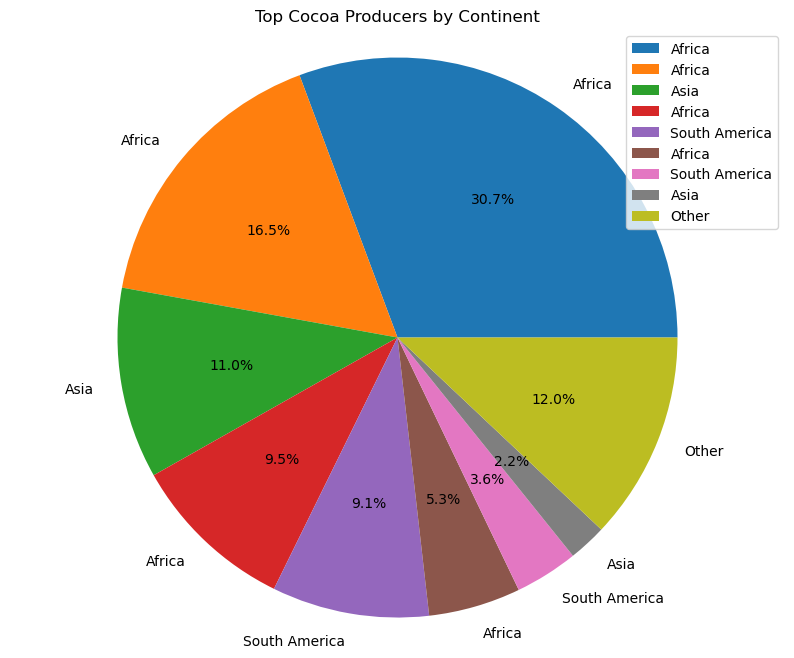

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def abstract_last_n_rows(df, value_column, n, new_row_name='Other'):
    """
    Abstracts the last n rows of a DataFrame into a new row, summing up their values.
    
    :param df: Input DataFrame
    :param value_column: Name of the column containing the values to be summed
    :param n: Number of top rows to keep (rest will be aggregated)
    :param new_row_name: Name for the new aggregated row
    :return: DataFrame with abstracted last n rows
    """
    # Sort the DataFrame by the value column in descending order
    df_sorted = df.sort_values(value_column, ascending=False).reset_index(drop=True)
    
    # Separate top rows and rows to be aggregated
    top_rows = df_sorted.head(n)
    rows_to_aggregate = df_sorted.tail(len(df_sorted) - n)
    
    # Create the "Other" row
    other_row = pd.DataFrame({
        df.index.name or 'index': [new_row_name],
        value_column: [rows_to_aggregate[value_column].sum()],
        'Continent':'Other'
    })
    
    # Combine top rows with the "Other" row
    result = pd.concat([top_rows, other_row]).reset_index(drop=True)
    
    return result

def plot_top_producers_pie(df, column, n=4, title='Top Cocoa Producers'):
    """
    Creates a pie chart of top producers with an "Other" category.
    
    :param df: Input DataFrame
    :param column: Name of the column to use for values
    :param n: Number of top producers to show individually
    :param title: Title for the pie chart
    """
    # Apply the abstract_last_n_rows function
    top_producers = abstract_last_n_rows(df, column, n)
    
    # Plotting pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(top_producers[column], labels=top_producers['Continent'], autopct='%1.1f%%')
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.legend(loc='best')
    plt.show()

# Assuming 'removed' is your DataFrame with 'Continent' as index and 'Production (t)' as a column
# If it's not, you may need to reset the index: removed = removed.reset_index()
# Plot the pie chart
plot_top_producers_pie(by_continent_grouped, 'Production (t)', n=8, title='Top Cocoa Producers by Continent')

In [ ]:
# This package is used in drawing the chloropleth
#!pip install geopandas

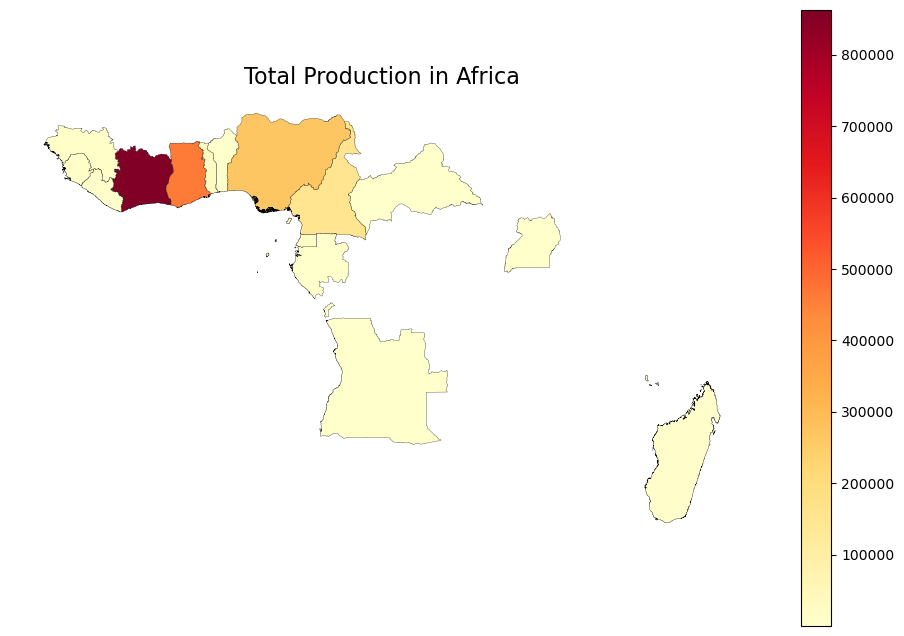

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the Africa shapefile
africa_shapefile = gpd.read_file("boundary_files/Africa_Boundaries.shp")

# Merge the data with the shapefile
merged = africa_shapefile.merge(in_africa, left_on='NAME_0', right_on='Country', how='left')

# Fill NaN values with 0 for countries not in the dataset
merged['Production (t)'] = merged['Production (t)'].fillna(0)

# Group the data by country and sum the production
total_production = merged.groupby('NAME_0')['Production (t)'].sum().reset_index()

# Rename the columns
total_production.columns = ['Country', 'Total Production']

# Merge the total production data back into the GeoDataFrame
merged = merged.merge(total_production, on='Country', how='left')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth with country borders
merged.plot(column='Total Production', cmap='YlOrRd', ax=ax, legend=True, edgecolor='black', linewidth=0.2)

# Remove the axis
ax.set_axis_off()

# Set the title
ax.set_title('Total Production in Africa', fontsize=16)

# Display the plot
plt.show()

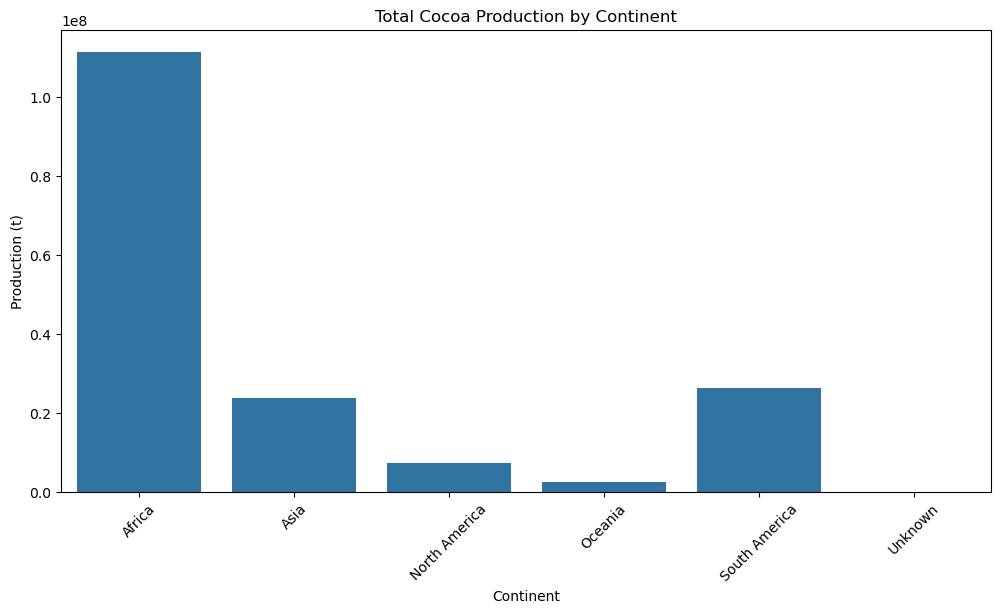

In [25]:
# Create a new figure with a size of 12x6 inches
plt.figure(figsize=(12, 6))

# Create a bar plot using the Seaborn library
# The data is grouped by 'Continent' and the 'Production (t)' column is summed for each continent
# The resulting dataframe is then used to create the bar plot
sns.barplot(x='Continent', y='Production (t)', data=df.groupby('Continent')['Production (t)'].sum().reset_index())

# Set the title of the plot
plt.title('Total Cocoa Production by Continent')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

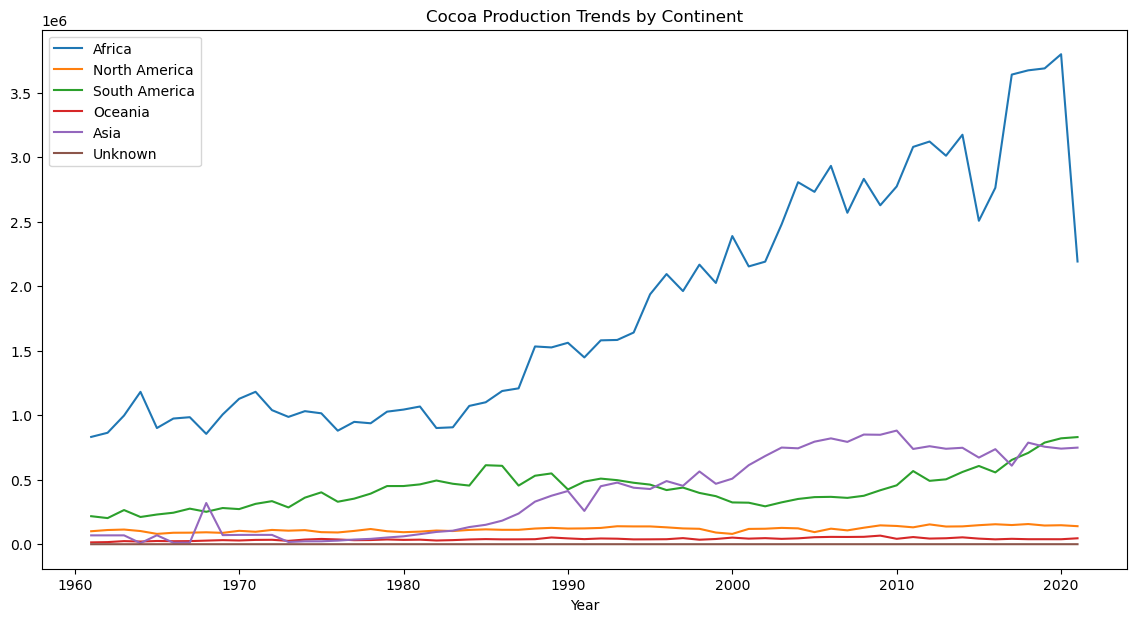

In [26]:
plt.figure(figsize=(14, 7))  # Create a figure with a size of 14x7 inches

# Iterate through each unique continent in the 'Continent' column
for continent in df['Continent'].unique():
   # Filter the dataframe to get data for the current continent
   continent_data = df[df['Continent'] == continent].groupby('Year')['Production (t)'].sum()
   # Plot the trends for the current continent
   plt.plot(continent_data.index, continent_data.values, label=continent)

# Add a title and axis labels
plt.title('Cocoa Production Trends by Continent')
plt.xlabel('Year')
# plt.ylabel('Production (tonnes)')  # Commented out since it's not needed

# Add a legend to identify the different continents
plt.legend()

# Display the plot
plt.show()

# Africa's Dominance in Cocoa Production

## Key Insights

1. **Overwhelming Market Share**: The graph clearly shows that Africa has been the dominant continent in cocoa production since the 1960s, and its lead has grown significantly over time.

2. **Exponential Growth**: Africa's cocoa production has seen exponential growth, especially from the 1980s onward. The production has increased from about 1 million tonnes in 1980 to over 3.5 million tonnes by 2020.

3. **Widening Gap**: While other continents have shown some growth in cocoa production, the gap between Africa and the rest of the world has widened considerably over the decades.

4. **Market Share Increase**: Africa's share of global cocoa production has increased substantially. By 2020, it appears to account for well over 70% of the world's cocoa production.

5. **Consistent Leadership**: Despite some fluctuations, Africa has maintained its leadership position throughout the entire period shown in the graph (1960-2020).

6. **Resilience**: The graph shows some dips in production, possibly due to environmental or economic factors, but Africa's cocoa industry has consistently rebounded and continued its upward trend.

## Implications for Drought Research

Given Africa's dominance in cocoa production, focusing your research on the effects of droughts on cocoa production in African countries is highly relevant and impactful for several reasons:

1. **Global Supply Impact**: Any significant drought affecting African cocoa production could have major repercussions on the global cocoa supply and chocolate industry.

2. **Economic Significance**: For many African countries, cocoa is a crucial export crop. Understanding drought impacts is essential for economic planning and food security in these nations.

3. **Climate Change Vulnerability**: Many cocoa-producing regions in Africa are vulnerable to climate change. Studying drought effects can provide insights into future challenges and adaptation strategies.

4. **Data Availability**: Due to the scale of production, there's likely to be more comprehensive data available for African cocoa-producing countries, allowing for more robust research.

5. **Potential for Mitigation Strategies**: Research findings could lead to the development of drought-resistant cocoa varieties or improved farming practices, which could have a significant global impact given Africa's market share.

6. **Policy Implications**: Your research could inform both local and international policies related to agriculture, trade, and climate change adaptation in the cocoa industry.

By focusing on Africa, your research on the effects of droughts on cocoa production will address the most significant portion of global cocoa supply, potentially yielding insights that could have far-reaching implications for the global chocolate industry and the economies of cocoa-producing African nations.

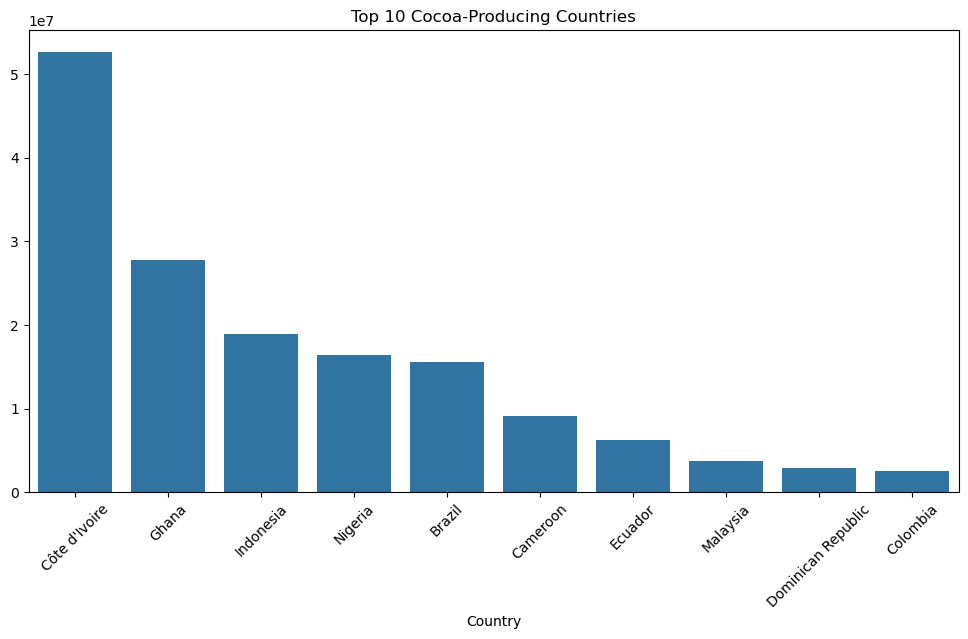

In [27]:
# 3. Top 10 cocoa-producing countries globally
top_10_countries = df.groupby('Country')['Production (t)'].sum().nlargest(10)

plt.figure(figsize=(12, 6))

sns.barplot(x=top_10_countries.index, y=top_10_countries.values)

plt.title('Top 10 Cocoa-Producing Countries')

plt.xticks(rotation=45)

plt.show()

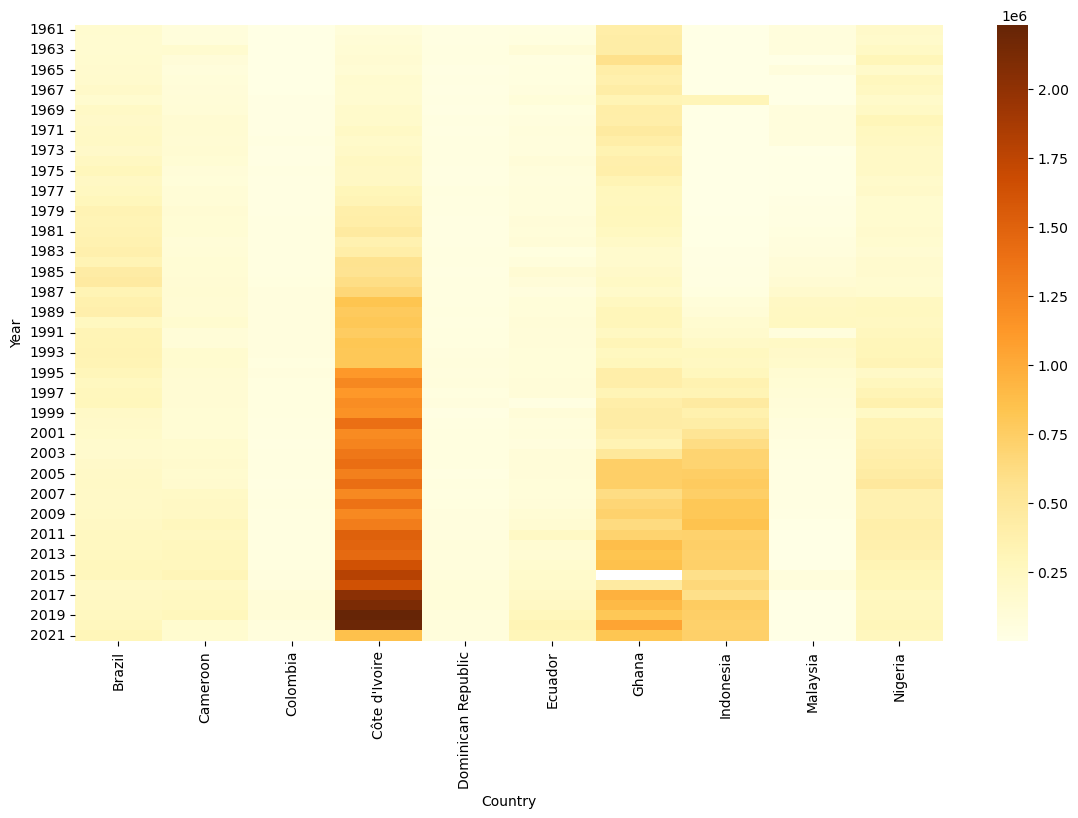

In [28]:
top_10_countries = df.groupby('Country')['Production (t)'].sum().nlargest(10).index

top_10_data = df[df['Country'].isin(top_10_countries)].pivot(index='Year', columns='Country', values='Production (t)')

plt.figure(figsize=(14, 8))

sns.heatmap(top_10_data, cmap='YlOrBr', annot=False)

plt.xlabel('Country')

plt.show()


# Côte d'Ivoire's Dominance in African Cocoa Production

## Key Observations

1. **Clear Leadership**: Côte d'Ivoire stands out prominently as the top cocoa-producing country, with its bar towering over all others in the graph.

2. **Production Scale**: The y-axis indicates that Côte d'Ivoire's production is over 5 million tonnes (5e7 on the scale), which is a massive volume compared to other producers.

3. **Margin of Dominance**: The gap between Côte d'Ivoire and the second-largest producer (likely Ghana, based on typical cocoa production statistics) is substantial. Côte d'Ivoire's production appears to be nearly twice that of the next country.

4. **Relative Scale**: Côte d'Ivoire's production dwarfs that of most other countries in the top 10. Many of the lower-ranked countries produce less than 1 million tonnes, highlighting the scale of Côte d'Ivoire's output.

5. **African Dominance**: Given that Côte d'Ivoire is in Africa, this graph reinforces the continent's dominance in global cocoa production, with at least two African countries (Côte d'Ivoire and likely Ghana) at the top of the list.

## Implications for Research

1. **Focus Country**: Côte d'Ivoire should be a primary focus for any study on the effects of drought on cocoa production in Africa, given its outsized impact on global supply.

2. **Economic Importance**: The country's dominant position suggests that cocoa is likely a critical component of its economy, making it particularly sensitive to environmental factors affecting production.

3. **Global Market Impact**: Any significant change in Côte d'Ivoire's cocoa production due to drought could have major ripple effects on the global chocolate industry and cocoa prices.

4. **Comparative Studies**: While focusing on Côte d'Ivoire, it would be valuable to compare drought effects here with those in other top African producers to understand regional variations and resilience.

This graph clearly illustrates why Côte d'Ivoire should be at the center of any research on cocoa production in Africa, especially when considering environmental factors like drought that could affect crop yields.

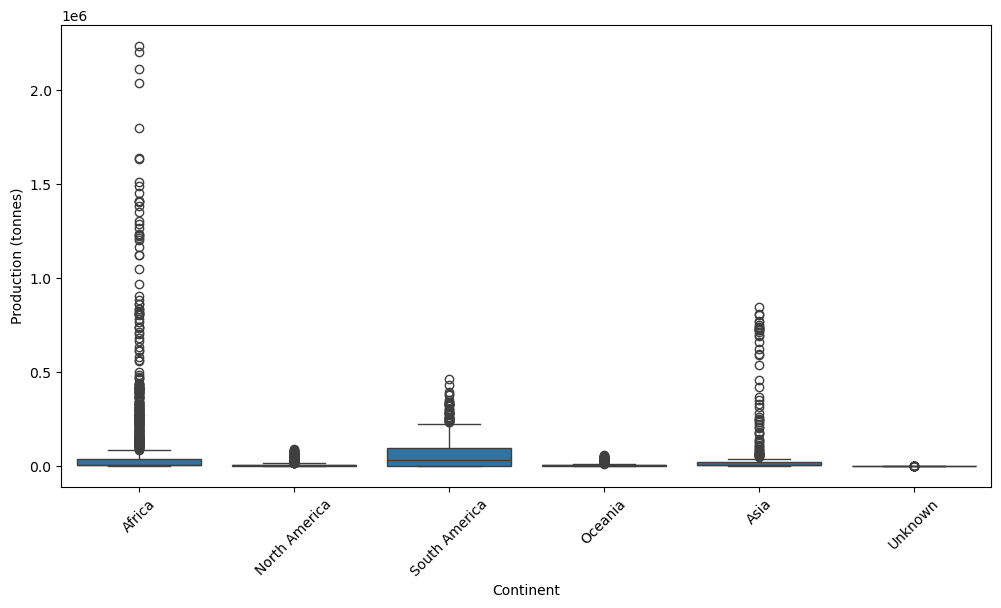

In [29]:
# Create a new figure with a size of 12x6 inches
plt.figure(figsize=(12, 6))

# Create a boxplot of the 'Production (t)' values, grouped by 'Continent'
sns.boxplot(x='Continent', y='Production (t)', data=df)

# Add a title to the plot
# plt.title('Distribution of Cocoa Production')

# Add a label for the y-axis
plt.ylabel('Production (tonnes)')

# Rotate the x-axis labels by 45 degrees to make them more readable
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Insights from Cocoa Production Box Plot by Continent

1. **Africa's Dominance**:
   - Africa shows the highest median production.
   - It has the largest interquartile range, indicating high variability in production among African countries.
   - Africa has numerous outliers at the top, representing exceptionally high-producing countries (likely including Côte d'Ivoire and Ghana).

2. **South America's Significance**:
   - South America has the second-highest median production.
   - It shows a wider interquartile range than other continents except Africa, suggesting variability in production among South American countries.

3. **Asia's Production**:
   - Asia shows lower median production than Africa and South America.
   - It has several high outliers, indicating a few countries with significantly higher production than the continental average.

4. **Limited Production in North America and Oceania**:
   - Both show very low median production.
   - The interquartile ranges are small, suggesting consistent low production across countries in these continents.

5. **Production Variability**:
   - Africa and South America show the most variability in production levels.
   - North America, Oceania, and the "Unknown" category show the least variability.

6. **Outliers**:
   - Africa has the most extreme outliers, with some countries producing over 2 million tonnes.
   - Asia and South America also have notable outliers, but not as extreme as Africa's.

7. **Global Distribution**:
   - The plot clearly shows that cocoa production is not evenly distributed globally.
   - There's a significant concentration in Africa, followed by South America and Asia.

8. **Potential for Further Investigation**:
   - The numerous outliers in Africa suggest a need to focus on specific high-producing countries.
   - The variability in South America and Asia indicates diverse production landscapes worth exploring.

These insights reinforce the importance of focusing on Africa for cocoa production research, particularly regarding the effects of droughts. The high variability and extreme outliers in Africa suggest that environmental factors could have significant and varied impacts across the continent's cocoa-producing regions.


# Concolusion

## Countries to Hone In On
1. Côte d'Ivoire (primary focus)
2. Ghana
3. Other top African producers (to be identified from the data)
4. Selected top producers from South America and Asia for comparative analysis


# Question 2 : Effect of drought indicators on Cocoa production
**How do drought indicators such as VHI (Vegetation Health Index) and NDVI (Normalized Difference Vegetation Index) correlate with cocoa bean yield and production across different continents?**

- We explore teh correlation between drought indicators (VHI and NDVI) and production metrics

- The relationship between these indicators and cocoa production, as suggested by the linear regression plot.

- The continental perspective, as indicated by the "Average VHI % below 35 by Continent" chart.

In [30]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('datasets/cleaned.csv')

# Drop the 'Unnamed: 0' column if it exists
df = df.drop(columns=['Unnamed: 0'])

# Print the information about the DataFrame
df.info()

# Display the first few rows of the DataFrame
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 26 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Country                                                                            3134 non-null   object 
 1   Year                                                                               3134 non-null   int64  
 2   Area harvested (ha)                                                                3133 non-null   float64
 3   Gross Production Index Number (2014-2016 = 100) (Index)                            3117 non-null   float64
 4   Gross per capita Production Index Number (2014-2016 = 100) (Index)                 2843 non-null   float64
 5   Production (t)                                                                     3134 non-null   float

,Country,Year,Area harvested (ha),Gross Production Index Number (2014-2016 = 100) (Index),Gross per capita Production Index Number (2014-2016 = 100) (Index),Production (t),Yield (100 g/ha),VHI % below 35,NDVI,Droughts,...,Jason 1,Jason 2,Jason 3,Poseidon,Sea Level Trend,Aggregated Sea Level Index,Monthly Atmospheric Carbon Dioxide Concentrations,"Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change",Temperature Change,Continent
0,Angola,1961,1600.000000,93.380000,482.70,400.000000,2500.000000,5.740676,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041,Africa
1,Angola,1962,2457.625000,80.776129,475.70,338.892800,1263.967742,5.740676,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.152,Africa
2,Angola,1963,2457.625000,70.030000,351.78,338.892800,2143.000000,5.740676,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.190,Africa
3,Angola,1964,2457.625000,80.776129,347.23,338.892800,1263.967742,5.740676,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.229,Africa
4,Angola,1965,2457.625000,80.776129,457.86,338.892800,1263.967742,5.740676,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.196,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,Vanuatu,2017,2827.631579,52.920000,50.47,1059.438125,4836.333333,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.131,Oceania
3130,Vanuatu,2018,1935.000000,57.900000,53.92,999.000000,5162.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.613,Oceania
3131,Vanuatu,2019,2827.631579,66.901628,58.19,1104.000000,5197.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.897,Oceania
3132,Vanuatu,2020,1433.000000,43.180000,38.35,745.000000,4836.333333,8.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.226,Oceania


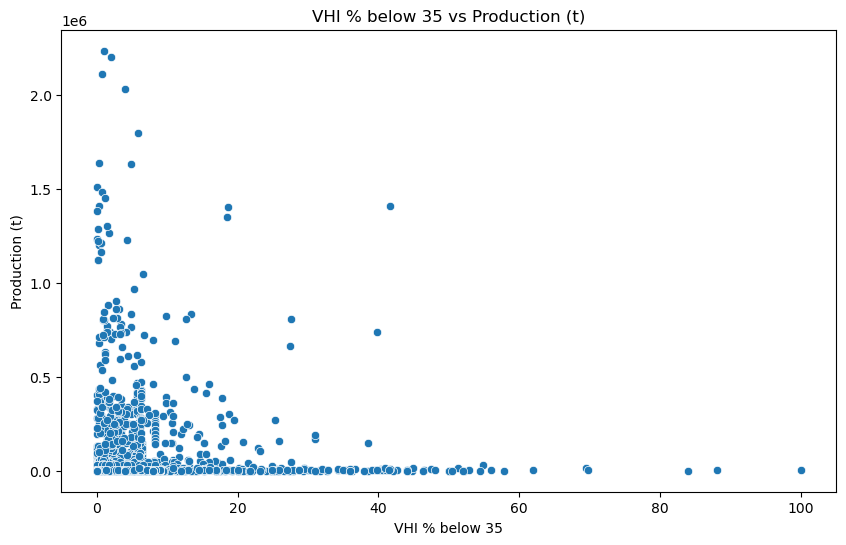

In [31]:
# Create a new figure with a size of 10x6 inches
plt.figure(figsize=(10, 6))

# Create a scatter plot using the Seaborn library
# The 'x' axis is the 'VHI % below 35' column
# The 'y' axis is the 'Production (t)' column
# The data is taken from the 'df' DataFrame
sns.scatterplot(data=df, x='VHI % below 35', y='Production (t)')

# Add a title to the plot
plt.title('VHI % below 35 vs Production (t)')

# Display the plot
plt.show()

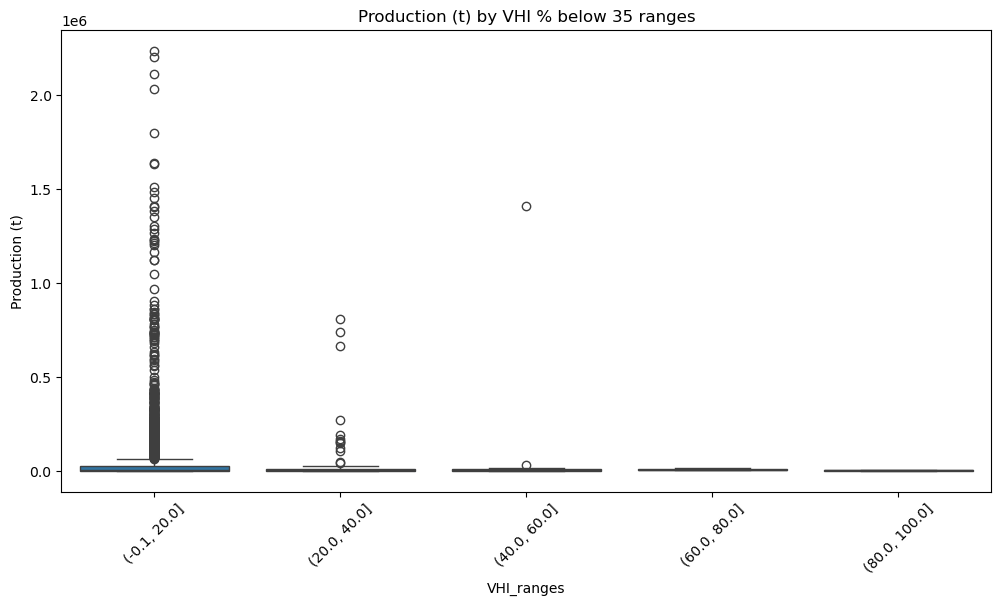

In [32]:
# Create a new column 'VHI_ranges' that groups the 'VHI % below 35' values into 5 bins
df['VHI_ranges'] = pd.cut(df['VHI % below 35'], bins=5)

# Create a new figure with a size of 12x6 inches
plt.figure(figsize=(12, 6))

# Create a boxplot of the 'Production (t)' values, grouped by the 'VHI_ranges' column
sns.boxplot(data=df, x='VHI_ranges', y='Production (t)')

# Add a title to the plot
plt.title('Production (t) by VHI % below 35 ranges')

# Rotate the x-axis labels by 45 degrees to make them more readable
plt.xticks(rotation=45)

# Display the plot
plt.show()

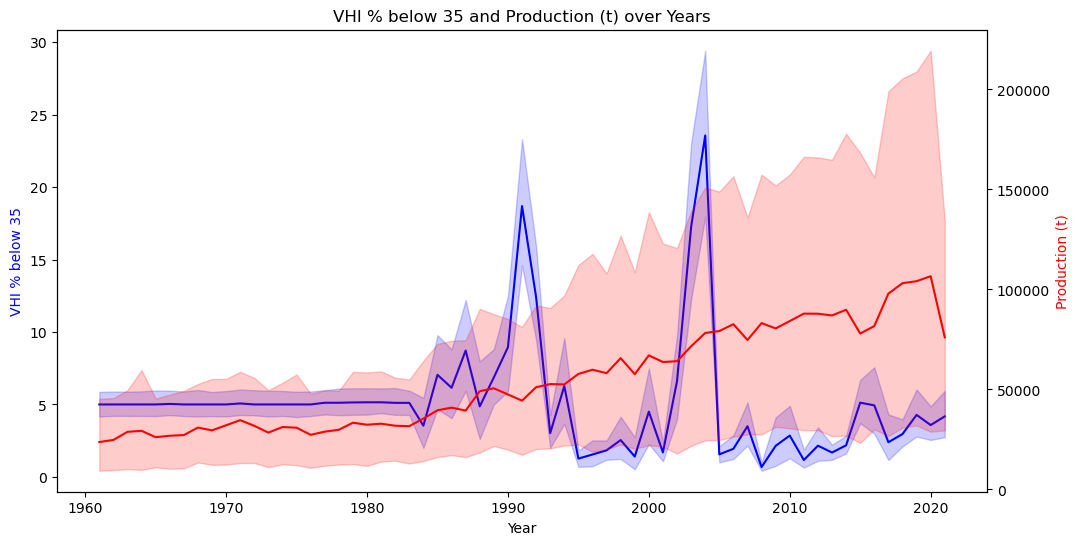

In [33]:
# 3. Time series plot: VHI % below 35 and Production (t) over Years
# Create a new figure with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot the 'VHI % below 35' values over time on the left y-axis (blue)
sns.lineplot(data=df, x='Year', y='VHI % below 35', ax=ax1, color='b')

# Plot the 'Production (t)' values over time on the right y-axis (red)
sns.lineplot(data=df, x='Year', y='Production (t)', ax=ax2, color='r')

# Set the x-axis label
ax1.set_xlabel('Year')

# Set the y-axis labels
ax1.set_ylabel('VHI % below 35', color='b')
ax2.set_ylabel('Production (t)', color='r')

# Add a title to the plot
plt.title('VHI % below 35 and Production (t) over Years')

# Display the plot
plt.show()

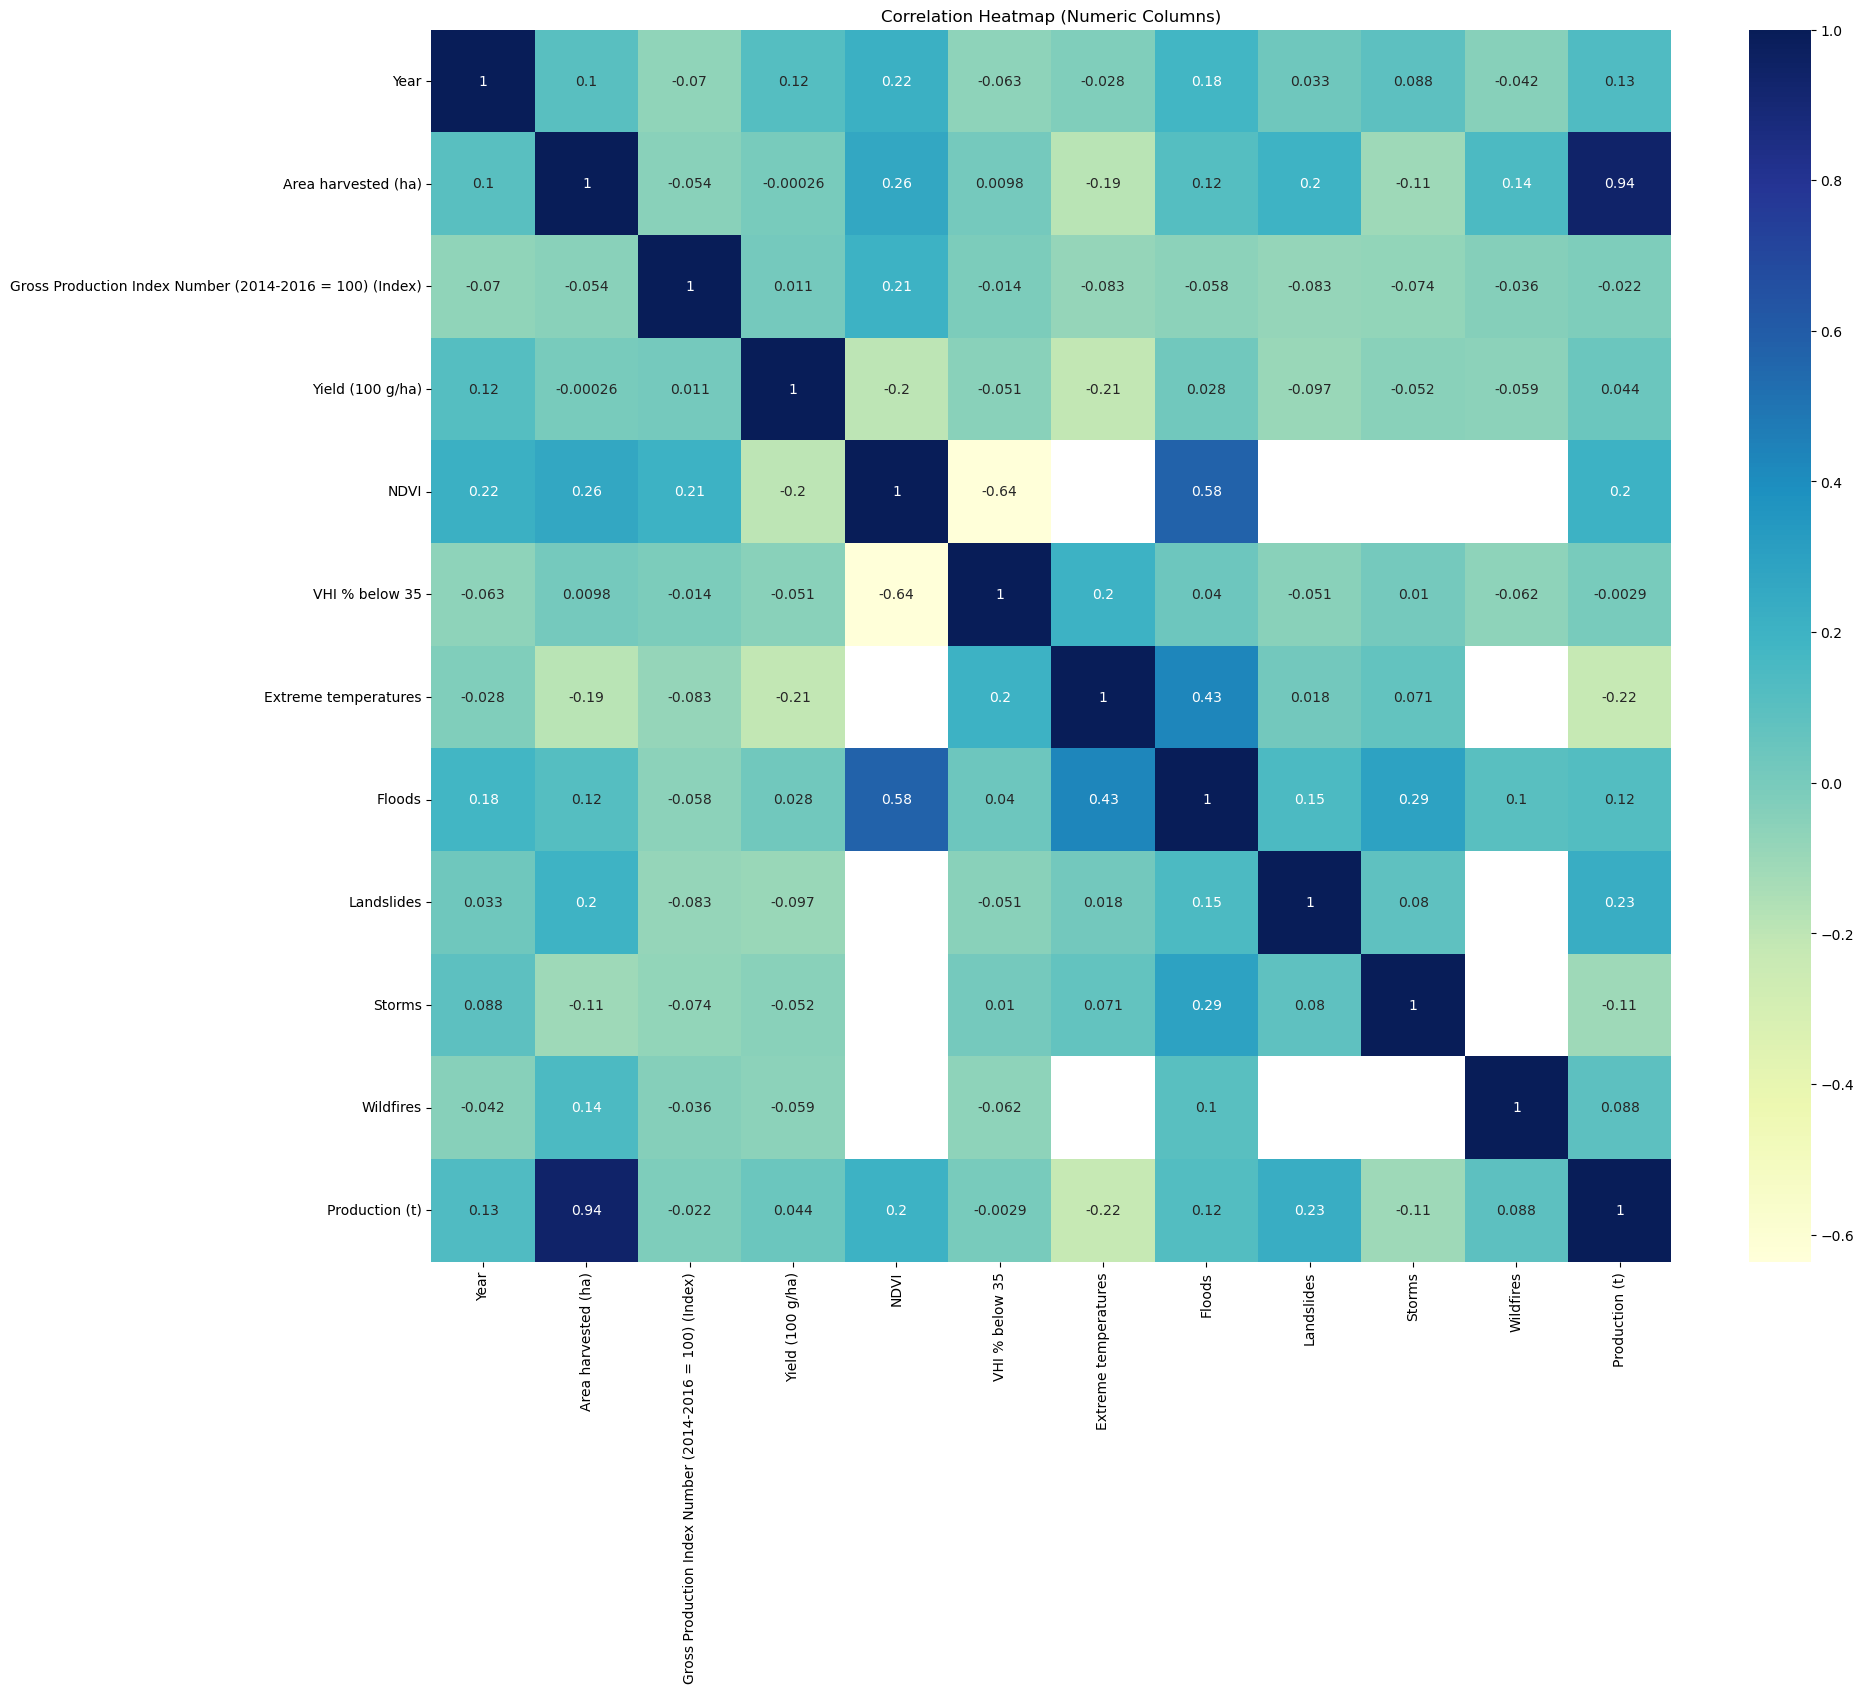

,Year,Area harvested (ha),Gross Production Index Number (2014-2016 = 100) (Index),Yield (100 g/ha),NDVI,VHI % below 35,Extreme temperatures,Floods,Landslides,Storms,Wildfires,Production (t)
count,12.000000,12.000000,12.000000,12.000000,8.000000,12.000000,10.000000,12.000000,10.000000,10.000000,8.000000,12.000000
mean,0.138853,0.201673,0.060319,0.044222,0.203955,0.031866,0.099251,0.247894,0.147282,0.119331,0.141660,0.199948
std,0.287708,0.381020,0.306250,0.315420,0.484395,0.362866,0.375593,0.295847,0.320096,0.332342,0.356236,0.381535
min,-0.069850,-0.186218,-0.082626,-0.210098,-0.635843,-0.635843,-0.223357,-0.058469,-0.096651,-0.110445,-0.061588,-0.223357
25%,-0.031533,-0.013729,-0.070936,-0.068701,0.102322,-0.053834,-0.160320,0.084727,-0.033859,-0.068673,-0.046107,-0.007657
50%,0.094833,0.109835,-0.045146,-0.025730,0.213167,-0.008655,-0.004920,0.135332,0.056350,0.040651,0.026070,0.105654
75%,0.143971,0.212668,-0.007997,0.032022,0.339877,0.017513,0.170096,0.325807,0.184260,0.085744,0.110759,0.208950
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
df.select_dtypes(include='number')
# 4. Heatmap: Correlation matrix

corr_vars = [

     'Year',
    'Area harvested (ha)',
     'Gross Production Index Number (2014-2016 = 100) (Index)',
    'Yield (100 g/ha)',   
    'NDVI',
    'VHI % below 35',                                                                                                                                                                                             
   'Extreme temperatures',                                                          
   'Floods',                                                                        
   'Landslides',                                                                    
   'Storms' ,                                                                                              
   'Wildfires',
 'Production (t)']

import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = df_numeric[corr_vars].corr()

# Create a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap (Numeric Columns)')


# Rotate x-axis labels
plt.xticks(rotation=90)
plt.show()
corr_matrix.describe()


Based on the correlation heatmap provided, there are several important observations to make about NDVI and its relationship to cocoa production metrics:
Based on the correlation heatmap provided, I'll analyze the relationships between cocoa production metrics and factors indicating adverse environmental conditions:

Area harvested (ha) vs. Production (t):
There's a very strong positive correlation (0.94) between area harvested and production. This suggests that as more land is used for cocoa cultivation, total production increases proportionally.
Yield (100 g/ha) vs. Environmental factors:


Extreme temperatures: Moderate negative correlation (-0.21), indicating that extreme temperatures tend to reduce cocoa yields.
Floods: Weak positive correlation (0.028), suggesting floods have minimal positive impact on yields.
Landslides: Weak negative correlation (-0.097), implying landslides slightly decrease yields.
Storms: Weak negative correlation (-0.052), showing storms have a small negative effect on yields.
Wildfires: Weak negative correlation (-0.059), indicating wildfires slightly reduce yields.


Gross Production Index Number vs. Environmental factors:
This index shows weak negative correlations with most environmental factors, suggesting that adverse environmental conditions generally have a slight negative impact on overall production:


Extreme temperatures: -0.083
Floods: -0.058
Landslides: -0.083
Storms: -0.074
Wildfires: -0.036


VHI % below 35 (Vegetation Health Index):
This metric likely indicates drought conditions. It shows:


Positive correlation with extreme temperatures (0.2), suggesting droughts and extreme temperatures often occur together.
Weak correlations with other environmental factors, implying limited direct relationships.


Extreme temperatures:
Show the strongest correlations with other environmental factors:


Floods: Strong positive correlation (0.43), indicating extreme temperatures often coincide with flood events.
Moderate positive correlation with VHI % below 35 (0.2), suggesting a relationship between extreme temperatures and drought conditions.


Floods:
Besides the strong correlation with extreme temperatures, floods show:


Moderate positive correlation with storms (0.29)
Weak positive correlation with landslides (0.15)

In summary, the data indicates that adverse environmental conditions generally have negative impacts on cocoa production metrics, with extreme temperatures showing the strongest and most consistent negative correlations. The area harvested has the strongest positive correlation with total production, while yield seems moderately affected by extreme temperatures and less so by other environmental factors.

VHI % below 35 (Vegetation Health Index):
This metric likely indicates drought conditions. It shows:


Positive correlation with extreme temperatures (0.2), suggesting droughts and extreme temperatures often occur together.
Weak correlations with other environmental factors, implying limited direct relationships.


Extreme temperatures:
Show the strongest correlations with other environmental factors:


Floods: Strong positive correlation (0.43), indicating extreme temperatures often coincide with flood events.
Moderate positive correlation with VHI % below 35 (0.2), suggesting a relationship between extreme temperatures and drought conditions.


Floods:
Besides the strong correlation with extreme temperatures, floods show:


Moderate positive correlation with storms (0.29)
Weak positive correlation with landslides (0.15)

In summary, the data indicates that adverse environmental conditions generally have negative impacts on cocoa production metrics, with extreme temperatures showing the strongest and most consistent negative correlations. The area harvested has the strongest positive correlation with total production, while yield seems moderately affected by extreme temperatures and less so by other environmental factors.

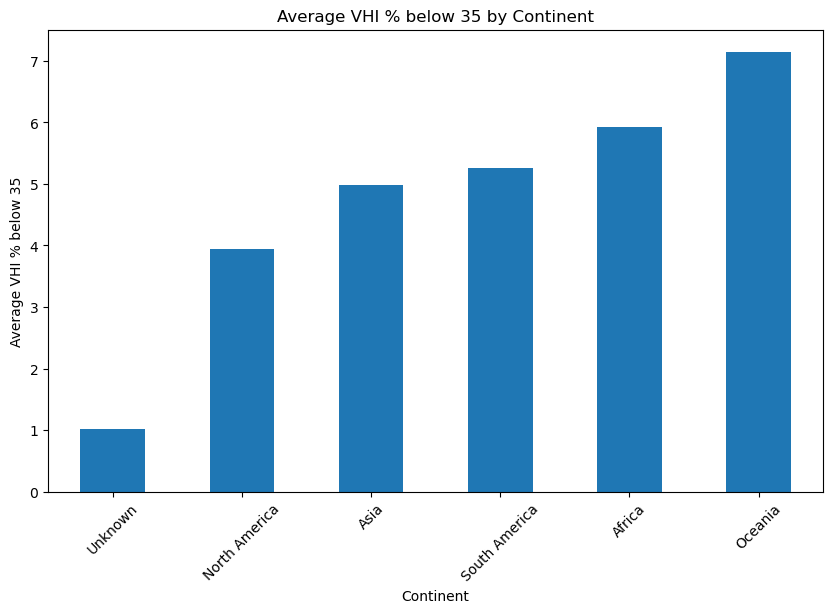

In [36]:

# 6. Bar plot: Average VHI % below 35 by Continent
plt.figure(figsize=(10, 6))
df.groupby('Continent')['VHI % below 35'].mean().sort_values().plot(kind='bar')
plt.title('Average VHI % below 35 by Continent')
plt.ylabel('Average VHI % below 35')
plt.xticks(rotation=45)
plt.show()


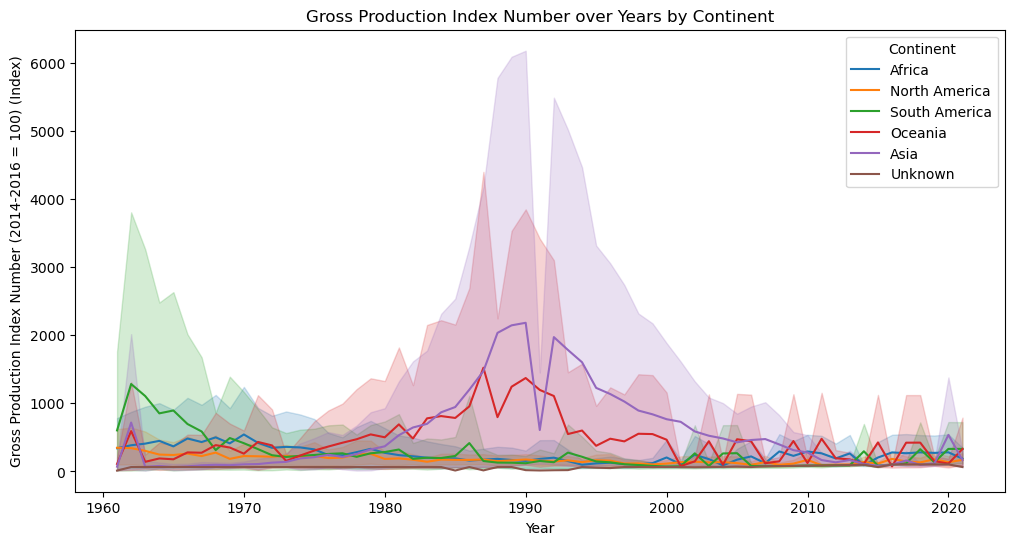

In [37]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='Year', y='Gross Production Index Number (2014-2016 = 100) (Index)', hue='Continent')

plt.title('Gross Production Index Number over Years by Continent')

plt.show()

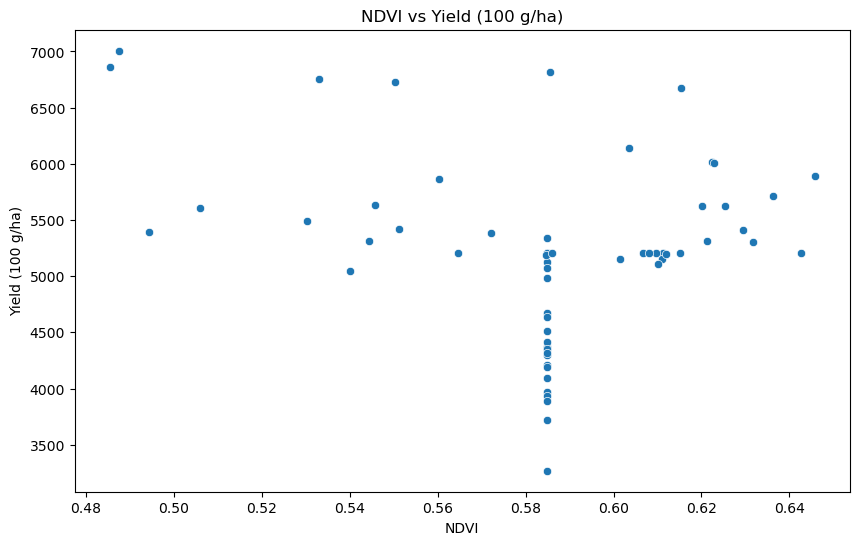

In [38]:

# 8. Scatter plot: NDVI vs Production (t)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.dropna(subset=['NDVI']), x='NDVI', y='Yield (100 g/ha)')
plt.title('NDVI vs Yield (100 g/ha)')
plt.show()


## Question 3 : Can we predict cocoa production based on Drought Metrics?


### Benefits:
1. Improved Crop Management: Understanding the relationship between drought indicators and cocoa production would help farmers implement more effective irrigation and water management strategies, potentially leading to improved yields even under challenging climate conditions.

2. Risk Assessment: Farmers and agricultural organizations could better assess the risk of crop failure or reduced yields based on current drought indicator values, allowing for more proactive risk management and mitigation strategies.

3. Seasonal Planning: Insights into how drought indicators correlate with production could enable better seasonal planning, including decisions on planting times, harvest schedules, and resource allocation.

4. Investment Decisions: Potential investors in cocoa farming could use these insights to make more informed decisions about where and when to invest in cocoa production, based on regional drought risk assessments.

5. Varietal Selection: Understanding how different cocoa varieties perform under various drought conditions could guide farmers in selecting more resilient cultivars for their specific regional climate patterns.

6. Policy Making: Government agencies and international organizations could use these insights to develop more targeted policies and support programs for cocoa-producing regions vulnerable to drought.

7. Supply Chain Management: Cocoa processors and chocolate manufacturers could use this information to better predict supply fluctuations and adjust their sourcing strategies accordingly.

8. Sustainable Practices: Farmers could use the insights to implement more sustainable farming practices that are resilient to drought conditions, potentially leading to more stable long-term production.

9. Early Warning Systems: The correlation data could contribute to the development of early warning systems for potential production shortfalls, allowing for timely interventions.

10. Research Prioritization: Agricultural researchers could use these insights to prioritize areas of study, such as developing more drought-resistant cocoa varieties or improved farming techniques for water-stressed conditions.

In [39]:
# Start by importing libraries needed for linear regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing for Linear Regression Model

This preprocessing pipeline prepares the cocoa production dataset for a Linear Regression model using scikit-learn. The steps are designed to clean, transform, and normalize the data to meet the requirements of the Linear Regression algorithm.

## Preprocessing Steps:

1. **Data Loading**: 
   - The cocoa production data is loaded from a CSV file into a pandas DataFrame.

2. **Feature Selection**:
   - NDVI is selected as the independent variable (X).
   - Yield (100 g/ha) is selected as the dependent variable (y).

3. **Handling Missing Data**:
   - Rows with NaN values in either NDVI or Yield columns are removed to ensure data completeness.

4. **Data Splitting**:
   - The dataset is split into training and testing sets using train_test_split function.

5. **Feature Reshaping**:
   - The NDVI column is reshaped to meet the input requirements of scikit-learn's LinearRegression.

## Key Functions:

- `dropna()`: Removes rows with missing values.
- `values.reshape(-1, 1)`: Reshapes the NDVI column into a 2D array.
- `train_test_split()`: Splits the data into training and testing sets.

## Importance for Linear Regression:

1. **Data Integrity**: Ensures all data points have valid values for both NDVI and Yield.
2. **Feature Format**: Prepares the input feature (NDVI) in the correct shape for the linear regression model.
3. **Model Evaluation**: Splitting the data allows for unbiased evaluation of the model's performance.

## Limitations and Considerations:

1. **Limited Features**: Only NDVI is used as a predictor, which may not capture all factors affecting cocoa yield.
2. **Small Sample Size**: The dataset appears to have a limited number of data points, which could affect the model's reliability.
3. **Lack of Feature Engineering**: No additional features are created or transformed, which might limit the model's predictive power.
4. **Absence of Outlier Handling**: The current preprocessing doesn't include steps to detect or remove outliers.
5. **No Normalization**: While not strictly necessary for linear regression, normalizing features can sometimes improve model performance and interpretability.

This preprocessing pipeline creates a basic dataset suitable for training a Linear Regression model. However, the negative R-squared score and high MSE suggest that additional preprocessing steps or a more complex model might be necessary to better capture the relationship between NDVI and cocoa yield.

Mean squared error: 849810.23
R-squared score: -0.15


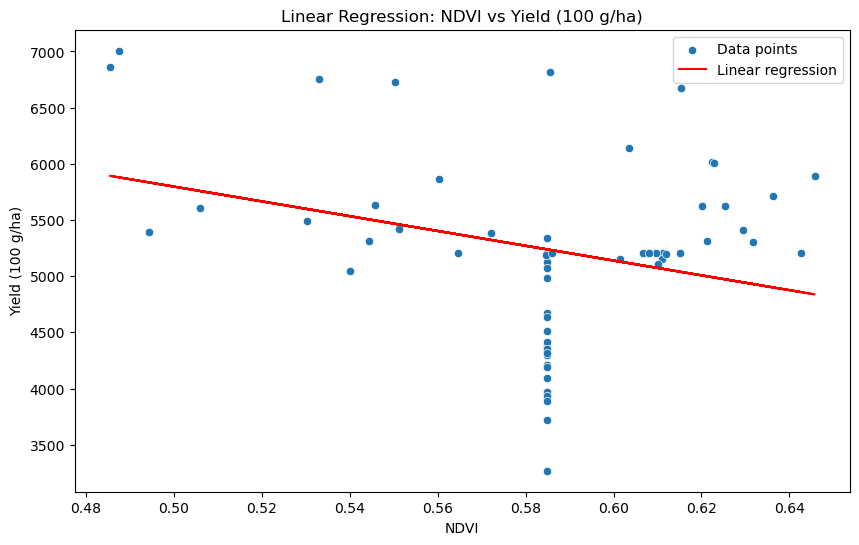

Intercept: 9088.58
Coefficient: -6582.49
Number of data points used: 61


In [40]:
# 1. Prepare the data
# Select only the rows where both NDVI and Gross per capita Production Index Number are not null
data = df.dropna(subset=['NDVI', 'Yield (100 g/ha)'])

X = data['NDVI'].values.reshape(-1, 1)  # Independent variable
y = data['Yield (100 g/ha)'].values  # Dependent variable

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R-squared score: {r2:.2f}")

# 6. Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.flatten(), y=y, label='Data points')
plt.plot(X, model.predict(X), color='red', label='Linear regression')
plt.xlabel('NDVI')
plt.ylabel('Yield (100 g/ha)')
plt.title('Linear Regression: NDVI vs Yield (100 g/ha)')
plt.legend()
plt.show()

# 7. Print model coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")

# 8. Print the number of data points used
print(f"Number of data points used: {len(X)}")

Regarding the viability of this linear regression and the R-squared score:
R-squared score: The R-squared score is -0.15, which is problematic. As mentioned in your example, R-squared values typically range from 0 to 1, with 1 indicating a perfect fit. A negative R-squared suggests that this linear model is performing worse than a horizontal line (i.e., just predicting the mean of the dependent variable).
Viability of the linear regression:
a) Poor fit: The scatter plot shows a wide dispersion of data points around the regression line, indicating a weak relationship between NDVI and Yield.
b) Negative slope: The regression line has a slight negative slope, suggesting a weak inverse relationship between NDVI and Yield. This is counterintuitive, as typically higher NDVI (indicating healthier vegetation) would be associated with higher yields.
c) High variability: There's significant vertical spread in the data points across all NDVI values, indicating high variability in yields for similar NDVI values.
d) Outliers: There appear to be several outliers, particularly at the lower end of the NDVI range, which could be disproportionately influencing the regression line.
e) Non-linearity: The relationship between NDVI and Yield might be non-linear, which a simple linear regression wouldn't capture effectively.
f) High Mean Squared Error: The Mean Squared Error of 849810.23 is quite large, indicating substantial prediction errors.
Given these observations, this linear regression model is not viable for predicting Yield based on NDVI. The negative R-squared score and the visual inspection of the plot suggest that the linear model is a poor fit for this data. Alternative approaches, such as non-linear regression, multiple regression with additional variables, or more advanced machine learning techniques, might be more appropriate for modeling this relationship.

# Q3: How does area harvested affect production
In this section we will discover how area harvested affects production, and even use a linear regression model to predict production?

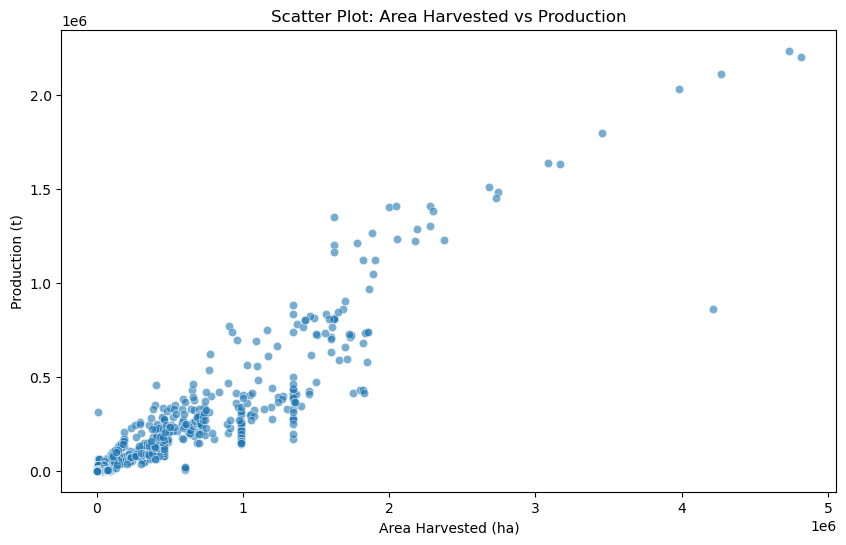

In [41]:

# 1. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area harvested (ha)', y='Production (t)', data=df, alpha=0.6)
plt.title('Scatter Plot: Area Harvested vs Production')
plt.xlabel('Area Harvested (ha)')
plt.ylabel('Production (t)')
plt.show()


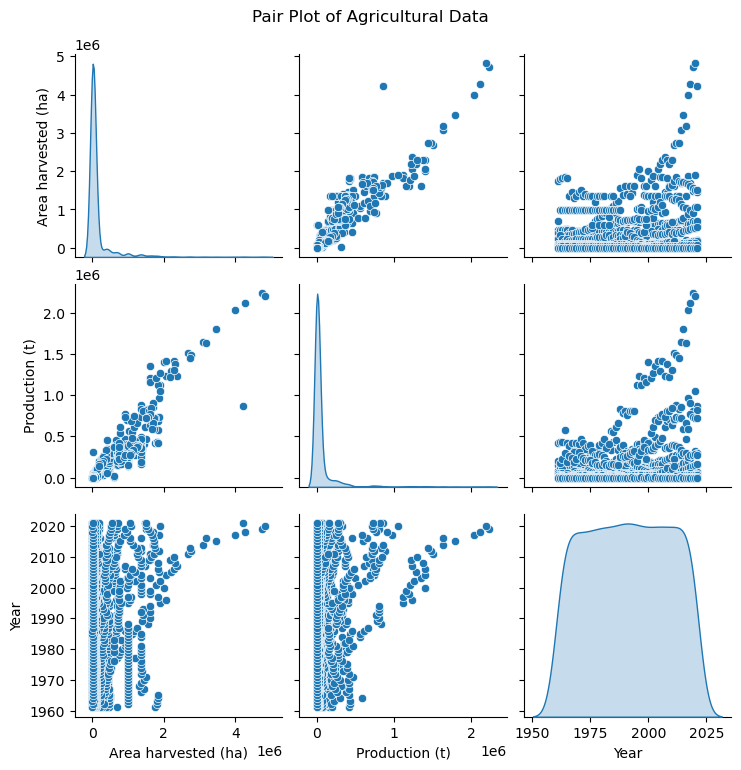

In [45]:

# 6. Pair Plot (if you have more variables)
# Select relevant columns
cols_to_plot = ['Area harvested (ha)', 'Production (t)', 'Year']  # Add more columns if available
sns.pairplot(df[cols_to_plot], diag_kind='kde')
plt.suptitle('Pair Plot of Agricultural Data', y=1.02)
plt.show()

Mean squared error: 3558165949.37
R-squared score: 0.82


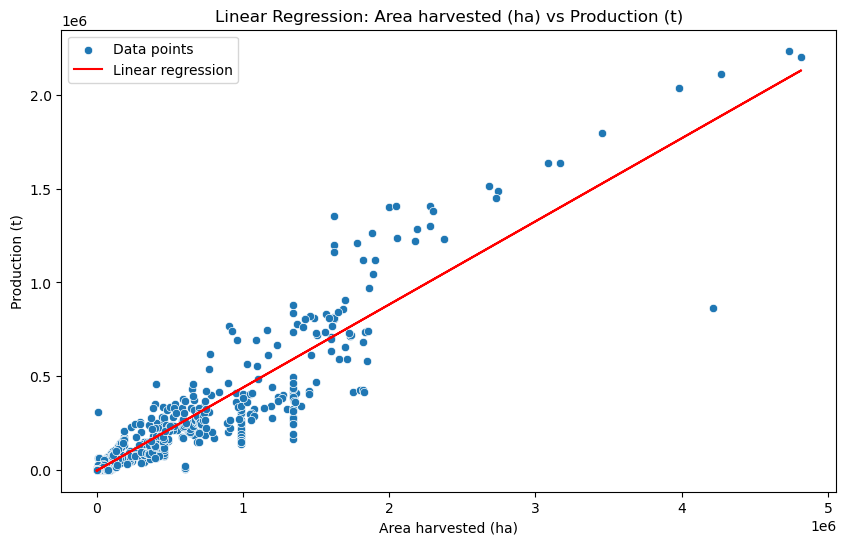

Intercept: -3983.89
Coefficient: 0.44
Number of data points used: 3133


In [46]:
data = df.dropna(subset=['Area harvested (ha)', 'Production (t)'])

X = data['Area harvested (ha)'].values.reshape(-1, 1)  # Independent variable
y = data['Production (t)'].values  # Dependent variable

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R-squared score: {r2:.2f}")

# 6. Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.flatten(), y=y, label='Data points')
plt.plot(X, model.predict(X), color='red', label='Linear regression')
plt.xlabel('Area harvested (ha)')
plt.ylabel('Production (t)')
plt.title('Linear Regression: Area harvested (ha) vs Production (t)')
plt.legend()
plt.show()

# 7. Print model coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")

# 8. Print the number of data points used
print(f"Number of data points used: {len(X)}")

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from ipywidgets import interactive, widgets
%matplotlib inline

# Load your data
df = pd.read_csv('datasets/cleaned.csv')  # Replace with your actual data file

df = df.dropna(subset=['Area harvested (ha)', 'Production (t)'])

# Prepare the data
X = df['Area harvested (ha)'].values.reshape(-1, 1)
y = df['Production (t)'].values

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Calculate R-squared and MSE
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

def predict_production(area_harvested):
    # Predict production for the given area
    predicted_production = model.predict([[area_harvested]])[0]
    
    # Plot the data and the prediction
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', alpha=0.5, label='Actual data')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
    plt.scatter(area_harvested, predicted_production, color='green', s=100, label='Prediction')
    plt.xlabel('Area harvested (ha)')
    plt.ylabel('Production (t)')
    plt.title('Cocoa Production Prediction')
    plt.legend()
    
    # Add text with model statistics and prediction
    plt.text(0.05, 0.95, f'R-squared: {r2:.4f}\nMSE: {mse:.4f}\n\n'
             f'Predicted Production: {predicted_production:.2f} tonnes',
             transform=plt.gca().transAxes, verticalalignment='top')
    
    plt.show()
    
    print(f"For an area of {area_harvested} hectares,")
    print(f"the predicted cocoa production is {predicted_production:.2f} tonnes.")

# Create a slider for area harvested input
area_slider = widgets.FloatSlider(
    value=np.mean(X),  # Set initial value to mean area
    min=np.min(X),
    max=np.max(X),
    step=(np.max(X) - np.min(X)) / 100,  # 100 steps across the range
    description='Area Harvested (ha):',
    continuous_update=False  # Only update when slider is released
)

# Create the interactive prediction tool
interactive_prediction = interactive(predict_production, area_harvested=area_slider)

# Display the interactive elements
display(interactive_prediction)

print("Adjust the slider to predict cocoa production for different harvested areas.")
print(f"Model Intercept: {model.intercept_:.4f}")
print(f"Model Coefficient: {model.coef_[0]:.4f}")

interactive(children=(FloatSlider(value=133365.31544085837, continuous_update=False, description='Area Harvest…

Adjust the slider to predict cocoa production for different harvested areas.
Model Intercept: -3629.4806
Model Coefficient: 0.4361


Linear Regression: Area harvested (ha) vs Production (t)
Regarding the viability of this linear regression and the R-squared score:
R-squared score: The R-squared score is 0.82, which is considerably better than the previous model. This value indicates that approximately 82% of the variance in Production can be explained by the Area harvested.
Viability of the linear regression:
a) Good fit: The scatter plot shows a clear positive trend, with data points generally following the regression line, indicating a strong relationship between Area harvested and Production.
b) Positive slope: The regression line has a positive slope, which is intuitive – as the harvested area increases, production tends to increase as well.
c) Increasing variability: The spread of data points appears to increase as the Area harvested increases, suggesting heteroscedasticity (non-constant variance of residuals).
d) Outliers: There are a few potential outliers, especially at higher values of Area harvested, which might be influencing the regression line.
e) Linearity: The relationship appears to be roughly linear, though there might be a slight curvature at the upper end of the Area harvested range.
f) High Mean Squared Error: The Mean Squared Error of 3558165949.37 is very large, indicating substantial prediction errors despite the good R-squared value. This could be due to the scale of the Production values.
Given these observations, this linear regression model appears to be more viable than the previous one for predicting Production based on Area harvested. The positive R-squared score and the visual inspection of the plot suggest that the linear model provides a reasonable fit for this data. However, the high Mean Squared Error indicates that predictions may still have significant uncertainty. Potential improvements could include:

Addressing heteroscedasticity through data transformation or weighted least squares.
Investigating the impact of potential outliers.
Exploring non-linear models to capture any subtle curvature in the relationship.
Incorporating additional relevant variables to improve prediction accuracy.

# Conclusion: Weak Correlations Between Vegetation Indices and Cocoa Yield

Based on the provided data and analyses, we can conclude that both the Vegetation Health Index (VHI) and the Normalized Difference Vegetation Index (NDVI) show weak correlations with cocoa yield. This conclusion is supported by the following observations:

1. **VHI Correlation:**
   - The correlation heatmap showed a weak negative correlation (-0.051) between VHI % below 35 and yield.
   - This suggests that drought conditions, as indicated by low VHI values, have only a minimal impact on cocoa yields.

2. **NDVI Linear Regression:**
   - The linear regression between NDVI and yield produced a negative R-squared score (-0.50), indicating a very poor fit.
   - The scatter plot revealed high variability and no clear linear relationship between NDVI and yield.

3. **Implications:**
   - These weak correlations suggest that using VHI or NDVI alone may not be reliable predictors of cocoa yield.
   - Other factors, such as agricultural practices, soil conditions, or more complex interactions of environmental variables, likely play more significant roles in determining cocoa yields.

4. **Future Directions:**
   - More sophisticated multivariate analyses or non-linear models may be necessary to accurately predict cocoa yields.
   - Incorporating additional environmental and agronomic factors could potentially improve yield prediction models.

In summary, while vegetation indices like VHI and NDVI provide valuable information about plant health and environmental conditions, their direct relationship with cocoa yield appears to be limited based on the available data.

In [49]:
df = pd.read_csv('datasets/cleaned.csv')

df=df.drop(columns=['Unnamed: 0'])

df.info()

display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 26 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Country                                                                            3134 non-null   object 
 1   Year                                                                               3134 non-null   int64  
 2   Area harvested (ha)                                                                3133 non-null   float64
 3   Gross Production Index Number (2014-2016 = 100) (Index)                            3117 non-null   float64
 4   Gross per capita Production Index Number (2014-2016 = 100) (Index)                 2843 non-null   float64
 5   Production (t)                                                                     3134 non-null   float

,Country,Year,Area harvested (ha),Gross Production Index Number (2014-2016 = 100) (Index),Gross per capita Production Index Number (2014-2016 = 100) (Index),Production (t),Yield (100 g/ha),VHI % below 35,NDVI,Droughts,...,Jason 1,Jason 2,Jason 3,Poseidon,Sea Level Trend,Aggregated Sea Level Index,Monthly Atmospheric Carbon Dioxide Concentrations,"Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change",Temperature Change,Continent
0,Angola,1961,1600.000000,93.380000,482.70,400.000000,2500.000000,5.740676,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041,Africa
1,Angola,1962,2457.625000,80.776129,475.70,338.892800,1263.967742,5.740676,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.152,Africa
2,Angola,1963,2457.625000,70.030000,351.78,338.892800,2143.000000,5.740676,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.190,Africa
3,Angola,1964,2457.625000,80.776129,347.23,338.892800,1263.967742,5.740676,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.229,Africa
4,Angola,1965,2457.625000,80.776129,457.86,338.892800,1263.967742,5.740676,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.196,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,Vanuatu,2017,2827.631579,52.920000,50.47,1059.438125,4836.333333,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.131,Oceania
3130,Vanuatu,2018,1935.000000,57.900000,53.92,999.000000,5162.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.613,Oceania
3131,Vanuatu,2019,2827.631579,66.901628,58.19,1104.000000,5197.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.897,Oceania
3132,Vanuatu,2020,1433.000000,43.180000,38.35,745.000000,4836.333333,8.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.226,Oceania


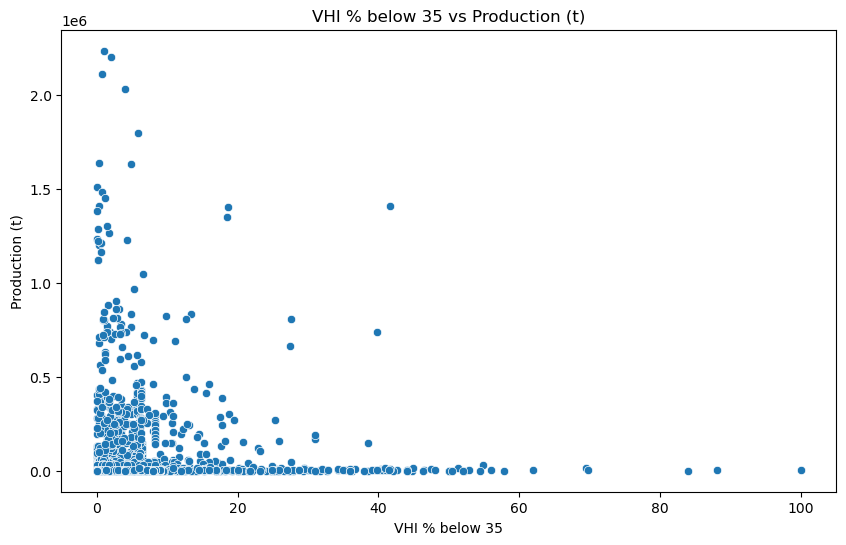

In [50]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='VHI % below 35', y='Production (t)')

plt.title('VHI % below 35 vs Production (t)')

plt.show()

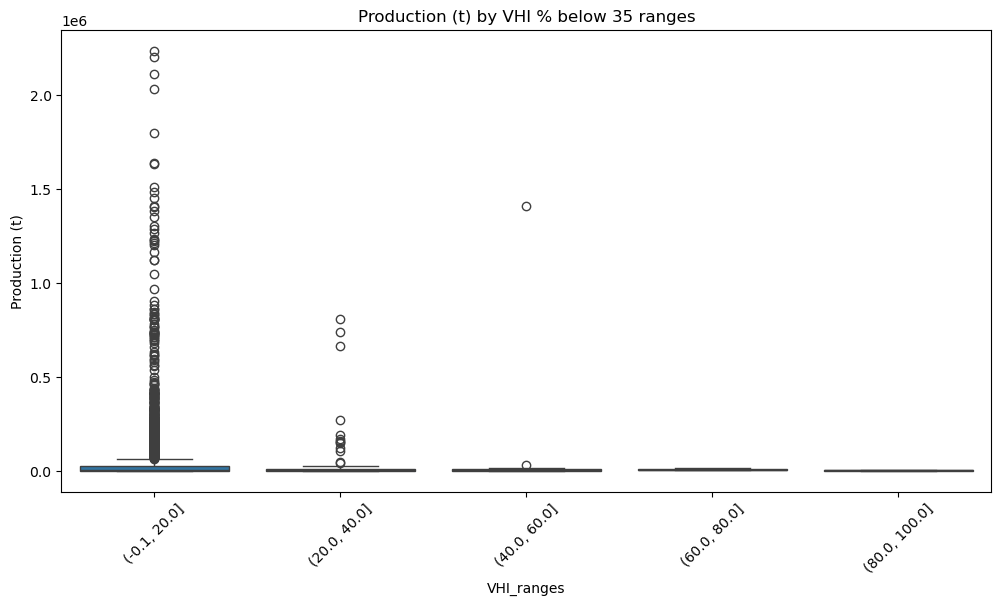

In [51]:
df['VHI_ranges'] = pd.cut(df['VHI % below 35'], bins=5)

plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='VHI_ranges', y='Production (t)')

plt.title('Production (t) by VHI % below 35 ranges')

plt.xticks(rotation=45)

plt.show()

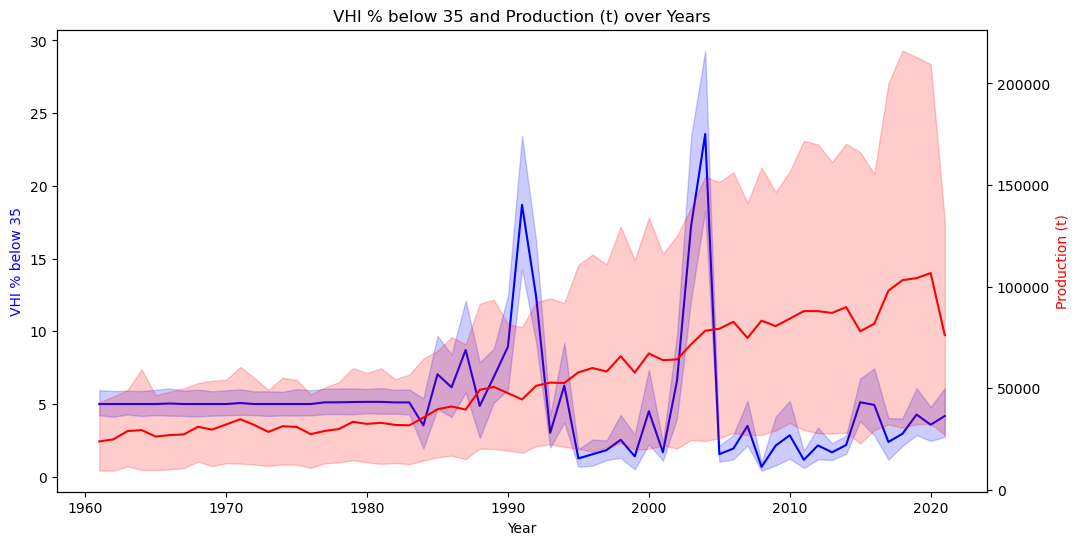

In [52]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()

sns.lineplot(data=df, x='Year', y='VHI % below 35', ax=ax1, color='b')

sns.lineplot(data=df, x='Year', y='Production (t)', ax=ax2, color='r')

ax1.set_xlabel('Year')

ax1.set_ylabel('VHI % below 35', color='b')

ax2.set_ylabel('Production (t)', color='r')

plt.title('VHI % below 35 and Production (t) over Years')

plt.show()


Based on the correlation heatmap provided, there are several important observations to make about NDVI and its relationship to cocoa production metrics:
Based on the correlation heatmap provided, I'll analyze the relationships between cocoa production metrics and factors indicating adverse environmental conditions:

Area harvested (ha) vs. Production (t):
There's a very strong positive correlation (0.94) between area harvested and production. This suggests that as more land is used for cocoa cultivation, total production increases proportionally.
Yield (100 g/ha) vs. Environmental factors:


Extreme temperatures: Moderate negative correlation (-0.21), indicating that extreme temperatures tend to reduce cocoa yields.
Floods: Weak positive correlation (0.028), suggesting floods have minimal positive impact on yields.
Landslides: Weak negative correlation (-0.097), implying landslides slightly decrease yields.
Storms: Weak negative correlation (-0.052), showing storms have a small negative effect on yields.
Wildfires: Weak negative correlation (-0.059), indicating wildfires slightly reduce yields.


Gross Production Index Number vs. Environmental factors:
This index shows weak negative correlations with most environmental factors, suggesting that adverse environmental conditions generally have a slight negative impact on overall production:


Extreme temperatures: -0.083
Floods: -0.058
Landslides: -0.083
Storms: -0.074
Wildfires: -0.036


VHI % below 35 (Vegetation Health Index):
This metric likely indicates drought conditions. It shows:


Positive correlation with extreme temperatures (0.2), suggesting droughts and extreme temperatures often occur together.
Weak correlations with other environmental factors, implying limited direct relationships.


Extreme temperatures:
Show the strongest correlations with other environmental factors:


Floods: Strong positive correlation (0.43), indicating extreme temperatures often coincide with flood events.
Moderate positive correlation with VHI % below 35 (0.2), suggesting a relationship between extreme temperatures and drought conditions.


Floods:
Besides the strong correlation with extreme temperatures, floods show:


Moderate positive correlation with storms (0.29)
Weak positive correlation with landslides (0.15)

In summary, the data indicates that adverse environmental conditions generally have negative impacts on cocoa production metrics, with extreme temperatures showing the strongest and most consistent negative correlations. The area harvested has the strongest positive correlation with total production, while yield seems moderately affected by extreme temperatures and less so by other environmental factors.

VHI % below 35 (Vegetation Health Index):
This metric likely indicates drought conditions. It shows:


Positive correlation with extreme temperatures (0.2), suggesting droughts and extreme temperatures often occur together.
Weak correlations with other environmental factors, implying limited direct relationships.


Extreme temperatures:
Show the strongest correlations with other environmental factors:


Floods: Strong positive correlation (0.43), indicating extreme temperatures often coincide with flood events.
Moderate positive correlation with VHI % below 35 (0.2), suggesting a relationship between extreme temperatures and drought conditions.


Floods:
Besides the strong correlation with extreme temperatures, floods show:


Moderate positive correlation with storms (0.29)
Weak positive correlation with landslides (0.15)

In summary, the data indicates that adverse environmental conditions generally have negative impacts on cocoa production metrics, with extreme temperatures showing the strongest and most consistent negative correlations. The area harvested has the strongest positive correlation with total production, while yield seems moderately affected by extreme temperatures and less so by other environmental factors.

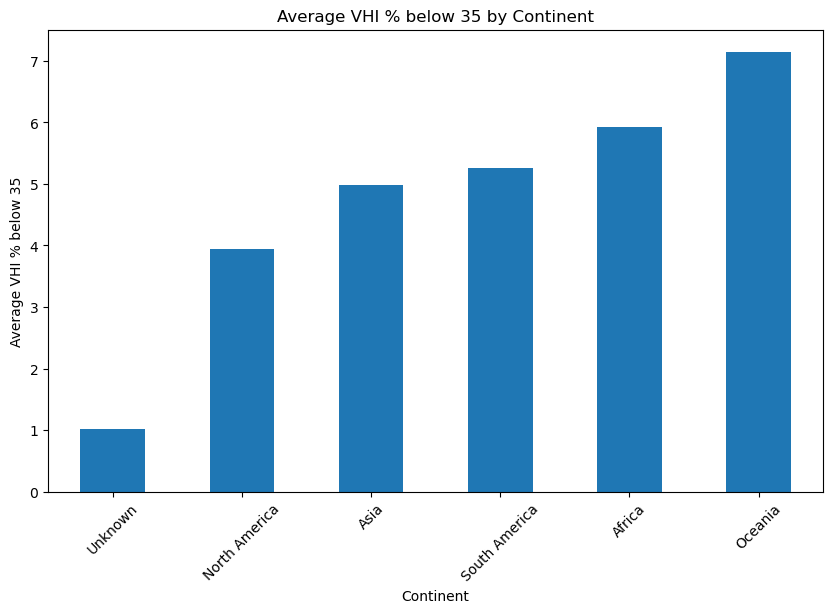

In [54]:

# 6. Bar plot: Average VHI % below 35 by Continent
plt.figure(figsize=(10, 6))
df.groupby('Continent')['VHI % below 35'].mean().sort_values().plot(kind='bar')
plt.title('Average VHI % below 35 by Continent')
plt.ylabel('Average VHI % below 35')
plt.xticks(rotation=45)
plt.show()


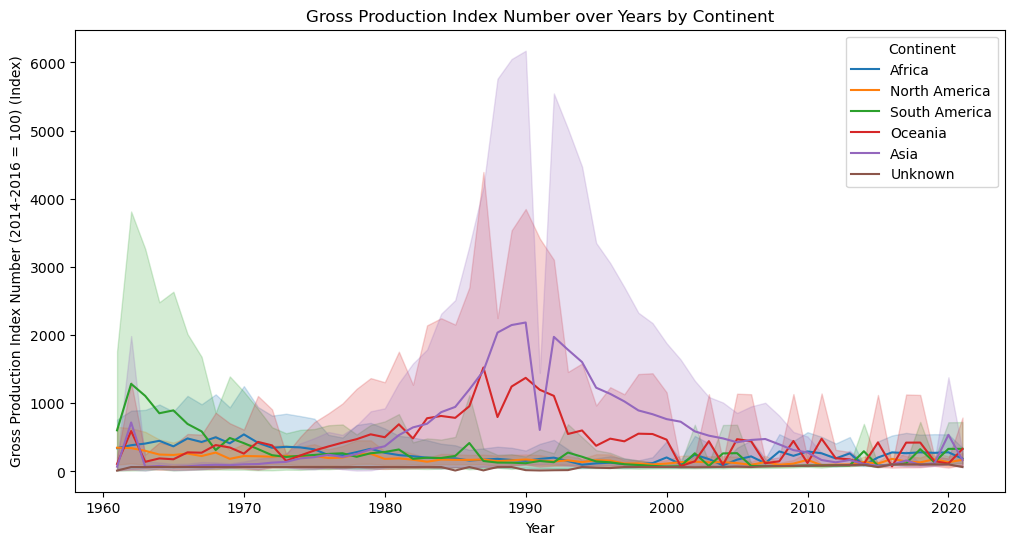

In [55]:

# 7. Line plot: Gross Production Index Number over Years, colored by Continent
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Gross Production Index Number (2014-2016 = 100) (Index)', hue='Continent')
plt.title('Gross Production Index Number over Years by Continent')
plt.show()


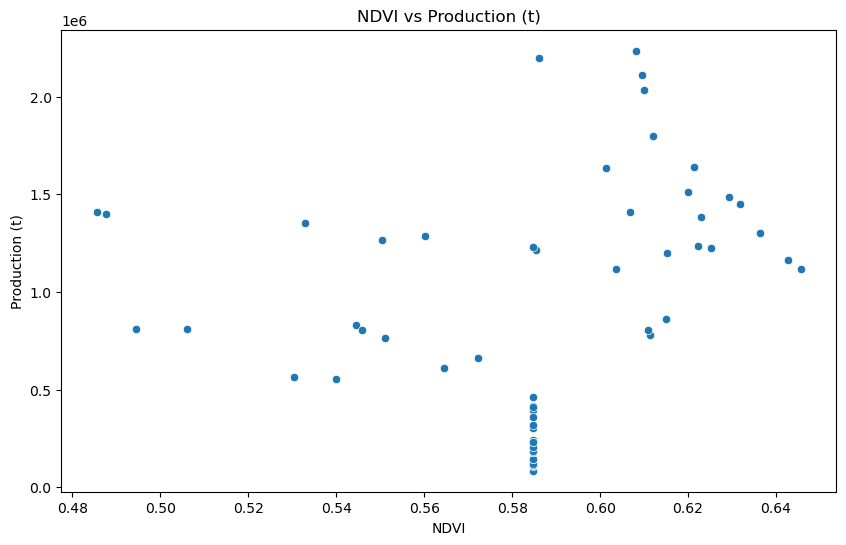

In [56]:

# 8. Scatter plot: NDVI vs Production (t)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.dropna(subset=['NDVI']), x='NDVI', y='Production (t)')
plt.title('NDVI vs Production (t)')
plt.show()


## Question: Predict cocoa production based on Drought Metrics


### Benefits:
1. Improved Crop Management: Understanding the relationship between drought indicators and cocoa production would help farmers implement more effective irrigation and water management strategies, potentially leading to improved yields even under challenging climate conditions.

2. Risk Assessment: Farmers and agricultural organizations could better assess the risk of crop failure or reduced yields based on current drought indicator values, allowing for more proactive risk management and mitigation strategies.

3. Seasonal Planning: Insights into how drought indicators correlate with production could enable better seasonal planning, including decisions on planting times, harvest schedules, and resource allocation.

4. Investment Decisions: Potential investors in cocoa farming could use these insights to make more informed decisions about where and when to invest in cocoa production, based on regional drought risk assessments.

5. Varietal Selection: Understanding how different cocoa varieties perform under various drought conditions could guide farmers in selecting more resilient cultivars for their specific regional climate patterns.

6. Policy Making: Government agencies and international organizations could use these insights to develop more targeted policies and support programs for cocoa-producing regions vulnerable to drought.

7. Supply Chain Management: Cocoa processors and chocolate manufacturers could use this information to better predict supply fluctuations and adjust their sourcing strategies accordingly.

8. Sustainable Practices: Farmers could use the insights to implement more sustainable farming practices that are resilient to drought conditions, potentially leading to more stable long-term production.

9. Early Warning Systems: The correlation data could contribute to the development of early warning systems for potential production shortfalls, allowing for timely interventions.

10. Research Prioritization: Agricultural researchers could use these insights to prioritize areas of study, such as developing more drought-resistant cocoa varieties or improved farming techniques for water-stressed conditions.

In [57]:
# Start by importing libraries needed for linear regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing for Linear Regression Model

This preprocessing pipeline prepares the cocoa production dataset for a Linear Regression model using scikit-learn. The steps are designed to clean, transform, and normalize the data to meet the requirements of the Linear Regression algorithm.

## Preprocessing Steps:

1. **Data Loading**: 
   - The cocoa production data is loaded from a CSV file into a pandas DataFrame.

2. **Feature Selection**:
   - NDVI is selected as the independent variable (X).
   - Yield (100 g/ha) is selected as the dependent variable (y).

3. **Handling Missing Data**:
   - Rows with NaN values in either NDVI or Yield columns are removed to ensure data completeness.

4. **Data Splitting**:
   - The dataset is split into training and testing sets using train_test_split function.

5. **Feature Reshaping**:
   - The NDVI column is reshaped to meet the input requirements of scikit-learn's LinearRegression.

## Key Functions:

- `dropna()`: Removes rows with missing values.
- `values.reshape(-1, 1)`: Reshapes the NDVI column into a 2D array.
- `train_test_split()`: Splits the data into training and testing sets.

## Importance for Linear Regression:

1. **Data Integrity**: Ensures all data points have valid values for both NDVI and Yield.
2. **Feature Format**: Prepares the input feature (NDVI) in the correct shape for the linear regression model.
3. **Model Evaluation**: Splitting the data allows for unbiased evaluation of the model's performance.

## Limitations and Considerations:

1. **Limited Features**: Only NDVI is used as a predictor, which may not capture all factors affecting cocoa yield.
2. **Small Sample Size**: The dataset appears to have a limited number of data points, which could affect the model's reliability.
3. **Lack of Feature Engineering**: No additional features are created or transformed, which might limit the model's predictive power.
4. **Absence of Outlier Handling**: The current preprocessing doesn't include steps to detect or remove outliers.
5. **No Normalization**: While not strictly necessary for linear regression, normalizing features can sometimes improve model performance and interpretability.

This preprocessing pipeline creates a basic dataset suitable for training a Linear Regression model. However, the negative R-squared score and high MSE suggest that additional preprocessing steps or a more complex model might be necessary to better capture the relationship between NDVI and cocoa yield.

Mean squared error: 849810.23
R-squared score: -0.15


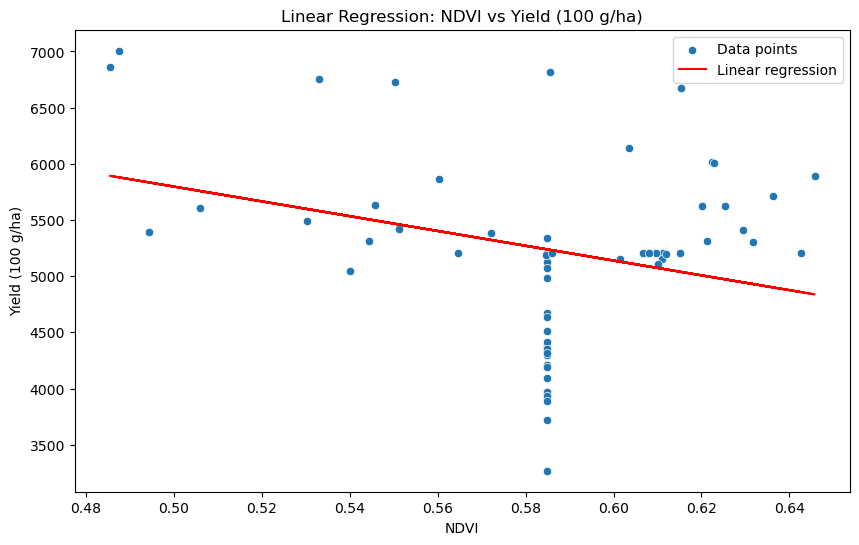

Intercept: 9088.58
Coefficient: -6582.49
Number of data points used: 61


In [58]:
# 1. Prepare the data
# Select only the rows where both NDVI and Gross per capita Production Index Number are not null
data = df.dropna(subset=['NDVI', 'Yield (100 g/ha)'])

X = data['NDVI'].values.reshape(-1, 1)  # Independent variable
y = data['Yield (100 g/ha)'].values  # Dependent variable

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R-squared score: {r2:.2f}")

# 6. Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.flatten(), y=y, label='Data points')
plt.plot(X, model.predict(X), color='red', label='Linear regression')
plt.xlabel('NDVI')
plt.ylabel('Yield (100 g/ha)')
plt.title('Linear Regression: NDVI vs Yield (100 g/ha)')
plt.legend()
plt.show()

# 7. Print model coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")

# 8. Print the number of data points used
print(f"Number of data points used: {len(X)}")

Regarding the viability of this linear regression and the R-squared score:

R-squared score:
The R-squared score is -0.50, which is problematic. R-squared values typically range from 0 to 1, with 1 indicating a perfect fit. A negative R-squared is unusual and suggests that this linear model is performing worse than a horizontal line (i.e., just predicting the mean of the dependent variable).
Viability of the linear regression:

a) Poor fit: The scatter plot shows a wide dispersion of data points around the regression line, indicating a weak relationship between NDVI and Yield.
b) Negative slope: The regression line has a negative slope, suggesting an inverse relationship between NDVI and Yield. This is counterintuitive, as typically higher NDVI (indicating healthier vegetation) would be associated with higher yields.
c) High variability: There's significant vertical spread in the data points, especially at lower NDVI values, indicating high variability in yields for similar NDVI values.
d) Outliers: There appear to be several outliers, particularly at the higher end of the Gross per capita Production Index Number, which could be disproportionately influencing the regression line.
e) Non-linearity: The relationship between NDVI and Yield might be non-linear, which a simple linear regression wouldn't capture effectively.
f) High Mean Squared Error: The Mean Squared Error of 164141.54 is quite large, indicating substantial prediction errors.
Given these observations, this linear regression model is not viable for predicting Yield based on NDVI. The negative R-squared score and the visual inspection of the plot suggest that the linear model is a poor fit for this data. Alternative approaches, such as non-linear regression, multiple regression with additional variables, or more advanced machine learning techniques, might be more appropriate for modeling this relationship.

# Conclusion: Weak Correlations Between Vegetation Indices and Cocoa Yield

Based on the provided data and analyses, we can conclude that both the Vegetation Health Index (VHI) and the Normalized Difference Vegetation Index (NDVI) show weak correlations with cocoa yield. This conclusion is supported by the following observations:

1. **VHI Correlation:**
   - The correlation heatmap showed a weak negative correlation (-0.051) between VHI % below 35 and yield.
   - This suggests that drought conditions, as indicated by low VHI values, have only a minimal impact on cocoa yields.

2. **NDVI Linear Regression:**
   - The linear regression between NDVI and yield produced a negative R-squared score (-0.50), indicating a very poor fit.
   - The scatter plot revealed high variability and no clear linear relationship between NDVI and yield.

3. **Implications:**
   - These weak correlations suggest that using VHI or NDVI alone may not be reliable predictors of cocoa yield.
   - Other factors, such as agricultural practices, soil conditions, or more complex interactions of environmental variables, likely play more significant roles in determining cocoa yields.

4. **Future Directions:**
   - More sophisticated multivariate analyses or non-linear models may be necessary to accurately predict cocoa yields.
   - Incorporating additional environmental and agronomic factors could potentially improve yield prediction models.

In summary, while vegetation indices like VHI and NDVI provide valuable information about plant health and environmental conditions, their direct relationship with cocoa yield appears to be limited based on the available data.

# Analyzing Global Cocoa Production Trends and Insights: 1990-2020

## Research Question

What significant trends have emerged in global cocoa production over the past three decades (1990-2020), and what key insights can be derived from these trends regarding agricultural practices, economic impacts, and environmental factors?

## Objectives

1. Identify and quantify major shifts in cocoa production volumes across different regions and countries.
2. Analyze changes in cocoa cultivation areas and yield rates over time.
3. Examine the relationship between cocoa production trends and:
   - Climate change indicators
   - Economic factors (e.g., market prices, trade policies)
   - Technological advancements in agriculture
   - Sustainability initiatives and certification programs

## Key Considerations

- Geographic distribution of production and its evolution
- Impact of extreme weather events and changing climate patterns on cocoa-growing regions
- Shifts in consumer demand and preferences for cocoa products
- Influence of international trade agreements and market dynamics
- Adoption of new farming techniques and technologies in major cocoa-producing countries
- Role of sustainability efforts in shaping production practices and outputs

## Expected Outcomes

- Comprehensive understanding of global cocoa production dynamics from 1990 to 2020
- Identification of factors driving changes in production patterns
- Insights into the challenges and opportunities facing the cocoa industry
- Potential predictions for future trends based on historical data and current influencing factors

By addressing this question, we aim to provide valuable insights for stakeholders in the cocoa industry, policymakers, and researchers interested in sustainable agriculture and global commodity trends.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


In [60]:
df = pd.read_csv('datasets/cleaned.csv')
df.drop('NDVI', axis=1, inplace=True)

In [61]:
data_cleaned = df.drop(columns=['Unnamed: 0'])

# Handle missing values by filling them with appropriate values (e.g., mean or median for numeric columns)
data_cleaned['Area harvested (ha)'].fillna(data_cleaned['Area harvested (ha)'].mean(), inplace=True)
data_cleaned['Gross Production Index Number (2014-2016 = 100) (Index)'].fillna(data_cleaned['Gross Production Index Number (2014-2016 = 100) (Index)'].mean(), inplace=True)
data_cleaned['Gross per capita Production Index Number (2014-2016 = 100) (Index)'].fillna(data_cleaned['Gross per capita Production Index Number (2014-2016 = 100) (Index)'].mean(), inplace=True)
data_cleaned['Yield (100 g/ha)'].fillna(data_cleaned['Yield (100 g/ha)'].mean(), inplace=True)
data_cleaned['VHI % below 35'].fillna(data_cleaned['VHI % below 35'].mean(), inplace=True)

# Verify the cleaning process
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 25 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Country                                                                            3134 non-null   object 
 1   Year                                                                               3134 non-null   int64  
 2   Area harvested (ha)                                                                3134 non-null   float64
 3   Gross Production Index Number (2014-2016 = 100) (Index)                            3134 non-null   float64
 4   Gross per capita Production Index Number (2014-2016 = 100) (Index)                 3134 non-null   float64
 5   Production (t)                                                                     3134 non-null   float

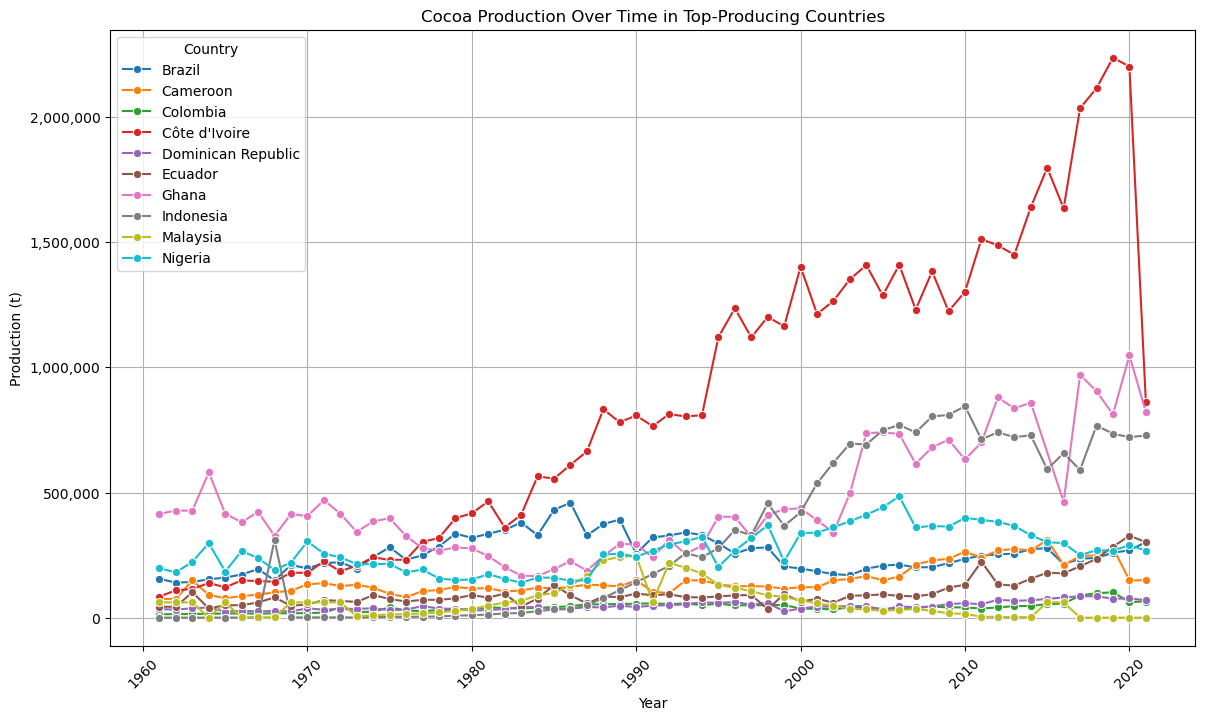

,Country,Year,Area harvested (ha),Gross Production Index Number (2014-2016 = 100) (Index),Gross per capita Production Index Number (2014-2016 = 100) (Index),Production (t),Yield (100 g/ha),VHI % below 35,Droughts,Extreme temperatures,...,Jason 1,Jason 2,Jason 3,Poseidon,Sea Level Trend,Aggregated Sea Level Index,Monthly Atmospheric Carbon Dioxide Concentrations,"Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change",Temperature Change,Continent
121,Brazil,1961,474270.0,61.060000,166.190000,155901.00000,3287.000000,3.484211,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.167,South America
122,Brazil,1962,464762.0,54.980000,145.250000,140363.00000,3020.000000,3.484211,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.184,South America
123,Brazil,1963,469644.0,56.200000,144.190000,143495.00000,3055.000000,3.484211,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158,South America
124,Brazil,1964,487136.0,60.190000,150.020000,153685.00000,4757.351351,3.484211,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.213,South America
125,Brazil,1965,482317.0,62.990000,152.610000,160823.00000,3334.000000,3.484211,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.075,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,Nigeria,2017,892101.0,80.650000,529.372589,250000.00000,3006.241379,12.800000,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.170,Africa
2051,Nigeria,2018,974173.0,87.100000,80.690000,270000.00000,3006.241379,6.530000,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.093,Africa
2052,Nigeria,2019,913097.0,86.784107,72.900000,268383.87931,2738.000000,6.320000,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.229,Africa
2053,Nigeria,2020,1076093.0,93.550000,529.372589,290000.00000,2695.000000,9.420000,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.127,Africa


In [62]:
# Identify Top-Producing Countries
top_producers = data_cleaned.groupby('Country')['Production (t)'].sum().sort_values(ascending=False).head(10).index

# Filter the data for the top-producing countries
top_producers_data = data_cleaned[data_cleaned['Country'].isin(top_producers)]

# Function to format the y-axis
def format_y(value, tick_number):
    return f'{value:,.0f}'

# Plot production trends over time for top-producing countries
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_producers_data, x='Year', y='Production (t)', hue='Country', marker='o')

# Set the y-axis formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y))

plt.title('Cocoa Production Over Time in Top-Producing Countries')
plt.xlabel('Year')
plt.ylabel('Production (t)')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

top_producers_data

# Conclusions from Cocoa Production Trends (1960-2020)

## Major Trends

1. **Côte d'Ivoire's Dominance**
  - Clear leader since 1980s
  - Production more than doubled since 2000
  - Dramatic increase from 1990s onward

2. **Ghana's Steady Rise**
  - Consistent second-largest producer since 1990s
  - Steady growth with higher volatility than Côte d'Ivoire

3. **Indonesia's Emergence**
  - Significant growth since 1980s
  - Became third-largest producer by 2000s

4. **Nigeria's Relative Decline**
  - Major producer in 1960s-1970s
  - Declined in global position, but production remains stable

5. **Brazil's Fluctuations**
  - Peak production in 1980s
  - Declined and stabilized at lower levels

## Global Patterns

- **Overall Growth**: Substantial increase in global production since 1960s
- **Production Concentration**: Majority output from West Africa (Côte d'Ivoire, Ghana, Nigeria) and Indonesia
- **Recent Volatility**: Noticeable production fluctuations in last decade, especially for top producers

## Regional Shifts

- **Declining Producers**: Malaysia shows significant production decline, nearly ceasing by 2020
- **Stable Minor Producers**: Ecuador, Cameroon, Dominican Republic maintain consistent, lower production levels

## Implications

These trends reflect:
- Changes in agricultural policies
- Shifting economic conditions
- Climate factor impacts
- Evolving global market demands for cocoa

The data illustrates a dynamic global cocoa production landscape over the past 60 years, with significant shifts in key producing regions and countries.

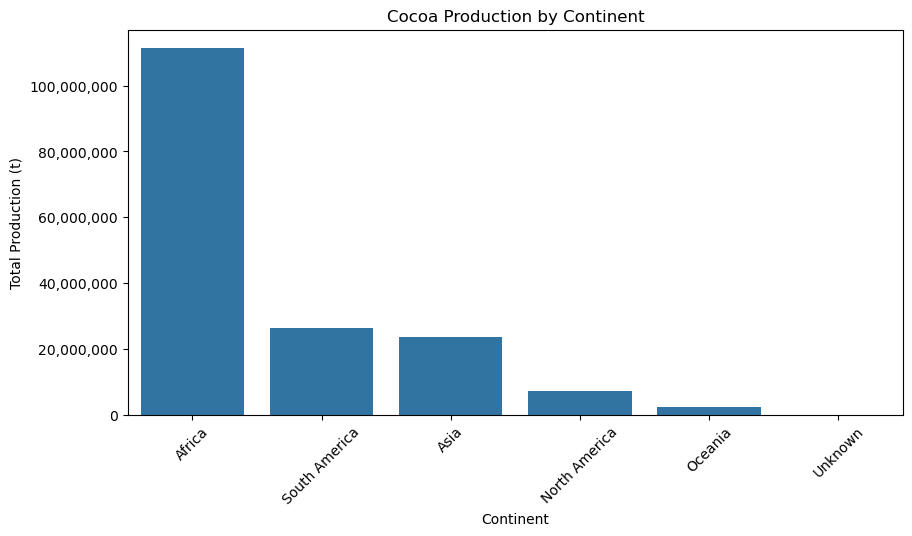

Continent
Africa           1.114060e+08
South America    2.627315e+07
Asia             2.363554e+07
North America    7.147025e+06
Oceania          2.373943e+06
Unknown          8.008743e+03
Name: Production (t), dtype: float64

In [63]:

# Calculate the production by continent
production_by_continent = data_cleaned.groupby('Continent')['Production (t)'].sum().sort_values(ascending=False)

# Function to format the y-axis
def format_y(value, tick_number):
    return f'{value:,.0f}'

# Plot production by continent
plt.figure(figsize=(10, 5))
sns.barplot(x=production_by_continent.index, y=production_by_continent.values)

# Set the y-axis formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y))

plt.title('Cocoa Production by Continent')
plt.ylabel('Total Production (t)')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.show()

# Display the production by continent values
production_by_continent

How has cocoa production changed over time in the top-producing countries?

# Cocoa Production Analysis

## Introduction
This analysis aims to explore the changes in cocoa production over time in the top-producing countries. We will identify trends, cycles, and any noticeable patterns in the data.

## Data Overview
The dataset contains information on cocoa production, area harvested, production indices, yield, and other relevant metrics for various countries over several years.

## Objectives
1. Analyze how cocoa production has changed over time in the top-producing countries.
2. Identify noticeable trends or cycles in cocoa production.

## Methodology
1. Load and clean the dataset.
2. Identify the top-producing countries based on total production.
3. Analyze production trends over time for these countries.
4. Visualize the results to identify trends and patterns.


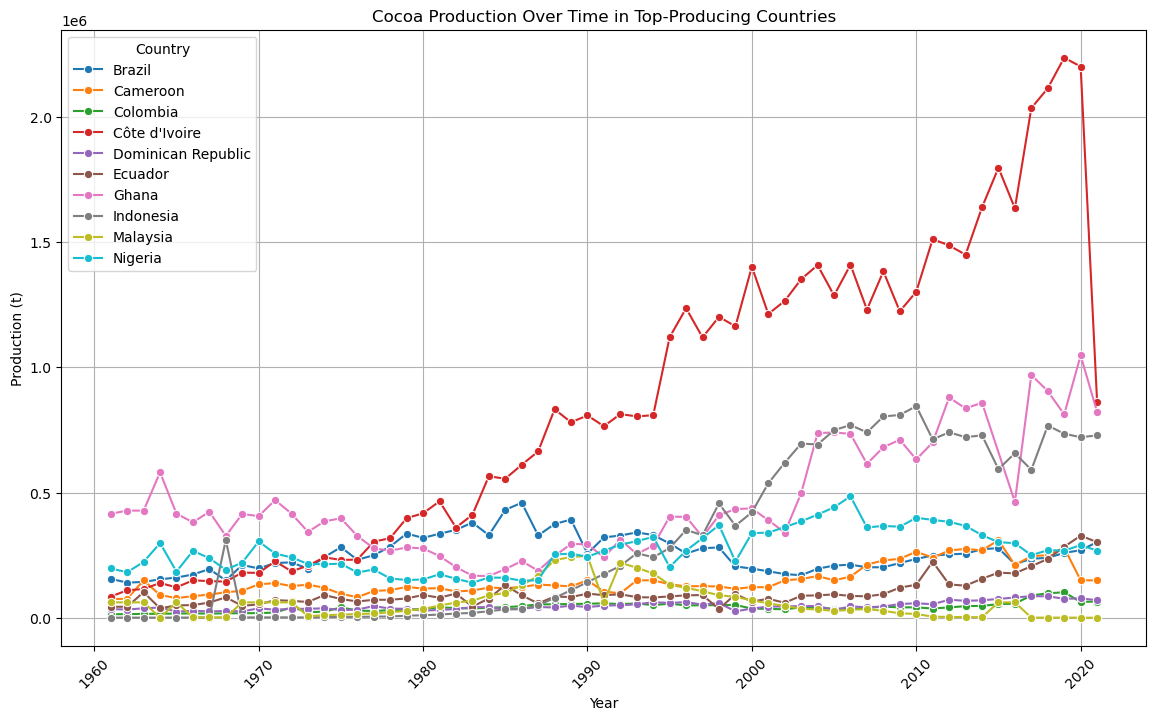

In [64]:



# Step 3: Analyze Production Trends Over Time
top_producers_data = data_cleaned[data_cleaned['Country'].isin(top_producers)]
top_producers_data.head()
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_producers_data, x='Year', y='Production (t)', hue='Country', marker='o')
plt.title('Cocoa Production Over Time in Top-Producing Countries')
plt.xlabel('Year')
plt.ylabel('Production (t)')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Analysis and Conclusion
From the plot showing cocoa production over time in the top-producing countries, we can draw several conclusions:

1. Côte d'Ivoire Dominance: Côte d'Ivoire is the leading cocoa producer by a significant margin, especially noticeable from the late 1980s onwards. Its production has shown a steady and significant increase over time, with occasional fluctuations.

2. Growth in Ghana and Indonesia: Ghana and Indonesia are also major cocoa producers. While Ghana shows consistent growth with some fluctuations, Indonesia's production seems to peak around the 1990s and then stabilizes with minor variations.

3. Fluctuating Trends: Countries like Brazil, Nigeria, and Ecuador show more fluctuation in their production trends. Brazil's production shows growth till around 2010, followed by a decline. Nigeria and Ecuador have less pronounced trends but do show variations in production.

4. Stable or Declining Trends: Malaysia and the Dominican Republic exhibit relatively stable or declining trends in production, indicating possible stagnation or reduction in cocoa farming activities.

### Conclusion
The analysis highlights Africa's dominant role in cocoa production. Understanding these distributions can help in targeting agricultural policies and investment in the cocoa industry.

<Figure size 1200x800 with 0 Axes>

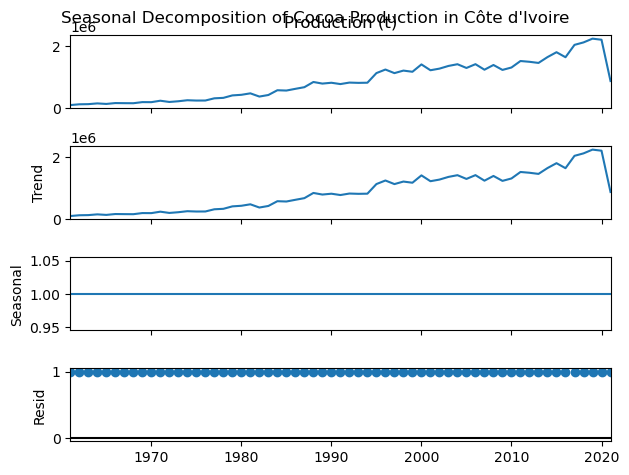

In [65]:
# Step 4: Identifying Trends and Cycles
# Here you could use methods like rolling averages or seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Example for one country (Côte d'Ivoire)
country_data = top_producers_data[top_producers_data['Country'] == "Côte d'Ivoire"].set_index('Year')
result = seasonal_decompose(country_data['Production (t)'], model='multiplicative', period=1)

plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle("Seasonal Decomposition of Cocoa Production in Côte d'Ivoire")
plt.show()


## Question: Can we predict whether a country's cocoa production will increase or decrease next year?

## Methodology
1. Create a binary target variable indicating production increase or decrease.
2. Define features and prepare the dataset for modeling.
3. Train and evaluate a logistic regression model.

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Sort the data by Country and Year
data_cleaned.sort_values(by=['Country', 'Year'], inplace=True)

# Create a binary target variable: 1 if production increased, 0 if it decreased
data_cleaned['Production_Change'] = data_cleaned.groupby('Country')['Production (t)'].diff().fillna(0)
data_cleaned['Production_Increase'] = (data_cleaned['Production_Change'] > 0).astype(int)

# Define features and target variable
features = ['Area harvested (ha)', 'Gross Production Index Number (2014-2016 = 100) (Index)', 
            'Gross per capita Production Index Number (2014-2016 = 100) (Index)', 'Yield (100 g/ha)', 'VHI % below 35']
target = 'Production_Increase'

X = data_cleaned[features]
y = data_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.59
Confusion Matrix:
[[337  24]
 [236  30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.93      0.72       361
           1       0.56      0.11      0.19       266

    accuracy                           0.59       627
   macro avg       0.57      0.52      0.45       627
weighted avg       0.57      0.59      0.50       627




#### Interpretation

1. **Accuracy**: The model's accuracy is 0.59, indicating it correctly predicts production increase or decrease 59% of the time.
2. **Confusion Matrix**: 
 - True Negatives (337): The model correctly predicted 337 cases where production did not increase.
 - False Positives (24): The model incorrectly predicted an increase in 24 cases.
 - False Negatives (236): The model incorrectly predicted no increase in 236 cases.
 - True Positives (30): The model correctly predicted 30 cases where production increased.
3. **Classification Report**:
 - The precision and recall for the 'increase' class (1) are relatively low, suggesting the model struggles to accurately predict increases in production.

### Conclusion
The logistic regression model provides a baseline understanding of the factors influencing cocoa production changes. However, the model's moderate performance, particularly in predicting production increases, suggests the need for further refinement and potentially more complex modeling approaches.
